from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/ECA/')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-08 20:53:56.338467: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 20:53:56.667689: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 20:53:56.752939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-08 20:53:56.752958: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 30

In [3]:
df = pd.read_csv("data/LocationC.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
ECC = df["ECC"]

X1, y1 = df_to_X_y(ECC, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-08 15:38:52.537340: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-08 15:38:52.537396: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 15:38:52.537435: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-08 15:38:52.537807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1/8 [==>...........................] - ETA: 14s - loss: 3471592.5000 - root_mean_squared_error: 1863.2209

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 430ms/step - loss: 3313906.2500 - root_mean_squared_error: 1820.4138 - val_loss: 3182170.2500 - val_root_mean_squared_error: 1783.8639
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 3128439.2500 - root_mean_squared_error: 1768.7395

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 376ms/step - loss: 3125858.7500 - root_mean_squared_error: 1768.0099 - val_loss: 2999171.2500 - val_root_mean_squared_error: 1731.8115
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2953395.5000 - root_mean_squared_error: 1718.5446

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 332ms/step - loss: 2945705.7500 - root_mean_squared_error: 1716.3058 - val_loss: 2822868.7500 - val_root_mean_squared_error: 1680.1395
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2770279.5000 - root_mean_squared_error: 1664.4156

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 298ms/step - loss: 2770279.5000 - root_mean_squared_error: 1664.4156 - val_loss: 2654403.2500 - val_root_mean_squared_error: 1629.2339
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2641282.5000 - root_mean_squared_error: 1625.2023

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 286ms/step - loss: 2604334.5000 - root_mean_squared_error: 1613.7950 - val_loss: 2492319.0000 - val_root_mean_squared_error: 1578.7080
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2271510.5000 - root_mean_squared_error: 1507.1531

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 316ms/step - loss: 2445289.7500 - root_mean_squared_error: 1563.7422 - val_loss: 2355100.2500 - val_root_mean_squared_error: 1534.6335
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2342684.2500 - root_mean_squared_error: 1530.5830

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 319ms/step - loss: 2343002.0000 - root_mean_squared_error: 1530.6868 - val_loss: 2293368.2500 - val_root_mean_squared_error: 1514.3871
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2282022.7500 - root_mean_squared_error: 1510.6366

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 323ms/step - loss: 2280365.5000 - root_mean_squared_error: 1510.0879 - val_loss: 2230413.0000 - val_root_mean_squared_error: 1493.4568
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 2312704.7500 - root_mean_squared_error: 1520.7579

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 304ms/step - loss: 2218047.7500 - root_mean_squared_error: 1489.3112 - val_loss: 2167714.5000 - val_root_mean_squared_error: 1472.3159
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2145582.2500 - root_mean_squared_error: 1464.7806

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 423ms/step - loss: 2154884.5000 - root_mean_squared_error: 1467.9525 - val_loss: 2106155.7500 - val_root_mean_squared_error: 1451.2600
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 2026942.3750 - root_mean_squared_error: 1423.7073

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 315ms/step - loss: 2093300.8750 - root_mean_squared_error: 1446.8245 - val_loss: 2045360.1250 - val_root_mean_squared_error: 1430.1609
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2032533.0000 - root_mean_squared_error: 1425.6693

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 350ms/step - loss: 2032533.0000 - root_mean_squared_error: 1425.6693 - val_loss: 1985694.8750 - val_root_mean_squared_error: 1409.1469
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2178466.0000 - root_mean_squared_error: 1475.9628

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 346ms/step - loss: 1973926.3750 - root_mean_squared_error: 1404.9648 - val_loss: 1926454.1250 - val_root_mean_squared_error: 1387.9677
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 1869617.5000 - root_mean_squared_error: 1367.3396

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 295ms/step - loss: 1914673.5000 - root_mean_squared_error: 1383.7173 - val_loss: 1868631.1250 - val_root_mean_squared_error: 1366.9789
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 1856113.5000 - root_mean_squared_error: 1362.3926

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 337ms/step - loss: 1856510.0000 - root_mean_squared_error: 1362.5381 - val_loss: 1811660.3750 - val_root_mean_squared_error: 1345.9794
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 1800355.8750 - root_mean_squared_error: 1341.7734

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 275ms/step - loss: 1800355.8750 - root_mean_squared_error: 1341.7734 - val_loss: 1754653.5000 - val_root_mean_squared_error: 1324.6333
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 1727021.2500 - root_mean_squared_error: 1314.1619

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 337ms/step - loss: 1743702.2500 - root_mean_squared_error: 1320.4932 - val_loss: 1699722.6250 - val_root_mean_squared_error: 1303.7341
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 1745259.2500 - root_mean_squared_error: 1321.0826

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 302ms/step - loss: 1688800.8750 - root_mean_squared_error: 1299.5387 - val_loss: 1645198.1250 - val_root_mean_squared_error: 1282.6527
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 1565898.6250 - root_mean_squared_error: 1251.3588

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 233ms/step - loss: 1633979.1250 - root_mean_squared_error: 1278.2720 - val_loss: 1591649.3750 - val_root_mean_squared_error: 1261.6058
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 1485080.2500 - root_mean_squared_error: 1218.6387

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 326ms/step - loss: 1580680.6250 - root_mean_squared_error: 1257.2512 - val_loss: 1538577.5000 - val_root_mean_squared_error: 1240.3940
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 1577001.0000 - root_mean_squared_error: 1255.7870

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 368ms/step - loss: 1527565.7500 - root_mean_squared_error: 1235.9473 - val_loss: 1485978.7500 - val_root_mean_squared_error: 1219.0073
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 1432652.0000 - root_mean_squared_error: 1196.9344

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 343ms/step - loss: 1474653.5000 - root_mean_squared_error: 1214.3531 - val_loss: 1433966.6250 - val_root_mean_squared_error: 1197.4834
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 1441447.0000 - root_mean_squared_error: 1200.6028

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 399ms/step - loss: 1423190.1250 - root_mean_squared_error: 1192.9753 - val_loss: 1382797.2500 - val_root_mean_squared_error: 1175.9240
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 1368968.0000 - root_mean_squared_error: 1170.0291

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 354ms/step - loss: 1372260.2500 - root_mean_squared_error: 1171.4352 - val_loss: 1333041.5000 - val_root_mean_squared_error: 1154.5742
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 1448534.6250 - root_mean_squared_error: 1203.5508

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 350ms/step - loss: 1322828.7500 - root_mean_squared_error: 1150.1429 - val_loss: 1283132.5000 - val_root_mean_squared_error: 1132.7544
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 1272887.2500 - root_mean_squared_error: 1128.2230

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 301ms/step - loss: 1272887.2500 - root_mean_squared_error: 1128.2230 - val_loss: 1234693.6250 - val_root_mean_squared_error: 1111.1677
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 1275325.0000 - root_mean_squared_error: 1129.3029

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 283ms/step - loss: 1224404.0000 - root_mean_squared_error: 1106.5280 - val_loss: 1186353.7500 - val_root_mean_squared_error: 1089.1987
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 1175992.8750 - root_mean_squared_error: 1084.4320

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 365ms/step - loss: 1183449.5000 - root_mean_squared_error: 1087.8646 - val_loss: 1158188.1250 - val_root_mean_squared_error: 1076.1915
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 1107154.7500 - root_mean_squared_error: 1052.2142

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 336ms/step - loss: 1155619.7500 - root_mean_squared_error: 1074.9976 - val_loss: 1130318.5000 - val_root_mean_squared_error: 1063.1644
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 1180728.2500 - root_mean_squared_error: 1086.6132

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 356ms/step - loss: 1127493.3750 - root_mean_squared_error: 1061.8350 - val_loss: 1101748.3750 - val_root_mean_squared_error: 1049.6420
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 1140148.5000 - root_mean_squared_error: 1067.7773

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 261ms/step - loss: 1098922.3750 - root_mean_squared_error: 1048.2950 - val_loss: 1073136.8750 - val_root_mean_squared_error: 1035.9232
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 1071310.0000 - root_mean_squared_error: 1035.0410

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 215ms/step - loss: 1070461.0000 - root_mean_squared_error: 1034.6309 - val_loss: 1045107.1875 - val_root_mean_squared_error: 1022.3049
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 1058226.7500 - root_mean_squared_error: 1028.7015

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 1041934.5000 - root_mean_squared_error: 1020.7520 - val_loss: 1016849.1250 - val_root_mean_squared_error: 1008.3893
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 1013702.8125 - root_mean_squared_error: 1006.8281

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 358ms/step - loss: 1013702.8125 - root_mean_squared_error: 1006.8281 - val_loss: 988647.8750 - val_root_mean_squared_error: 994.3077
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 988092.3125 - root_mean_squared_error: 994.0283

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 284ms/step - loss: 985596.1875 - root_mean_squared_error: 992.7720 - val_loss: 960629.0625 - val_root_mean_squared_error: 980.1169
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 1004432.1250 - root_mean_squared_error: 1002.2136

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 285ms/step - loss: 957521.3125 - root_mean_squared_error: 978.5302 - val_loss: 932962.2500 - val_root_mean_squared_error: 965.8997
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 899634.2500 - root_mean_squared_error: 948.4905

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 261ms/step - loss: 929647.8125 - root_mean_squared_error: 964.1824 - val_loss: 905321.3125 - val_root_mean_squared_error: 951.4838
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 960182.4375 - root_mean_squared_error: 979.8890

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 286ms/step - loss: 902204.6250 - root_mean_squared_error: 949.8445 - val_loss: 877441.2500 - val_root_mean_squared_error: 936.7183
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 799420.8750 - root_mean_squared_error: 894.1034

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 325ms/step - loss: 874126.0000 - root_mean_squared_error: 934.9471 - val_loss: 850168.1250 - val_root_mean_squared_error: 922.0456
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 813101.6875 - root_mean_squared_error: 901.7215

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 308ms/step - loss: 846909.0000 - root_mean_squared_error: 920.2766 - val_loss: 822979.5625 - val_root_mean_squared_error: 907.1822
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 776835.2500 - root_mean_squared_error: 881.3826

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 292ms/step - loss: 819455.4375 - root_mean_squared_error: 905.2378 - val_loss: 796076.5000 - val_root_mean_squared_error: 892.2312
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 728810.1875 - root_mean_squared_error: 853.7038

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 271ms/step - loss: 792573.0625 - root_mean_squared_error: 890.2657 - val_loss: 768930.7500 - val_root_mean_squared_error: 876.8870
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 778102.6250 - root_mean_squared_error: 882.1013

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 253ms/step - loss: 765533.8125 - root_mean_squared_error: 874.9479 - val_loss: 742205.3750 - val_root_mean_squared_error: 861.5134
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 735409.3750 - root_mean_squared_error: 857.5601

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 313ms/step - loss: 738693.8750 - root_mean_squared_error: 859.4730 - val_loss: 715863.2500 - val_root_mean_squared_error: 846.0870
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 725881.1250 - root_mean_squared_error: 851.9866

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 256ms/step - loss: 712391.6875 - root_mean_squared_error: 844.0330 - val_loss: 689534.5000 - val_root_mean_squared_error: 830.3821
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 708017.5000 - root_mean_squared_error: 841.4377

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 240ms/step - loss: 686289.0000 - root_mean_squared_error: 828.4256 - val_loss: 663526.0625 - val_root_mean_squared_error: 814.5711
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 668185.6250 - root_mean_squared_error: 817.4262

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 278ms/step - loss: 660201.3125 - root_mean_squared_error: 812.5277 - val_loss: 638284.8125 - val_root_mean_squared_error: 798.9273
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 586369.1250 - root_mean_squared_error: 765.7474

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 258ms/step - loss: 634747.3125 - root_mean_squared_error: 796.7103 - val_loss: 613338.6250 - val_root_mean_squared_error: 783.1594
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 622008.8750 - root_mean_squared_error: 788.6754

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 307ms/step - loss: 609913.1250 - root_mean_squared_error: 780.9694 - val_loss: 588406.5000 - val_root_mean_squared_error: 767.0766
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 611848.3750 - root_mean_squared_error: 782.2074

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 3ms/step


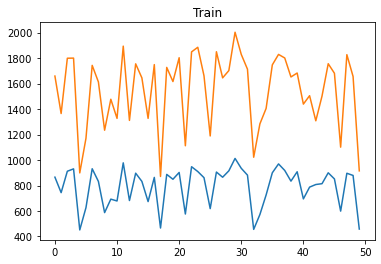

2/2 [==============================] - 0s 5ms/step


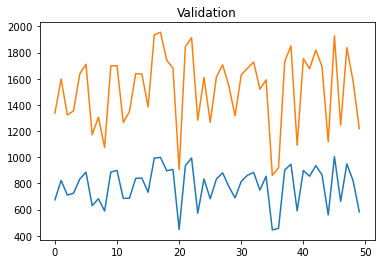

3/3 [==============================] - 0s 4ms/step


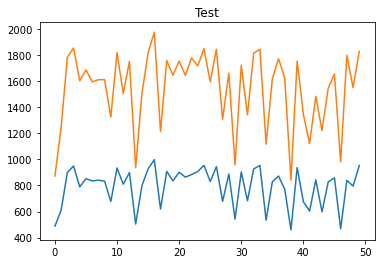

3/3 [==============================] - 0s 3ms/step


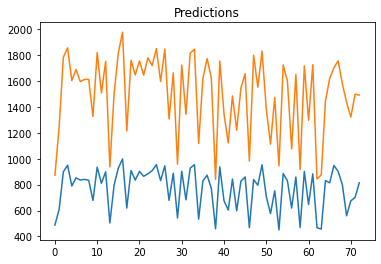

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2388759.0000 - root_mean_squared_error: 1545.5610 

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 2s/step - loss: 2417606.0000 - root_mean_squared_error: 1554.8652 - val_loss: 2404424.0000 - val_root_mean_squared_error: 1550.6205
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2407715.7500 - root_mean_squared_error: 1551.6816

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2417397.7500 - root_mean_squared_error: 1554.7983 - val_loss: 2404194.5000 - val_root_mean_squared_error: 1550.5465
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2430123.7500 - root_mean_squared_error: 1558.8854

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2417115.7500 - root_mean_squared_error: 1554.7076 - val_loss: 2403795.7500 - val_root_mean_squared_error: 1550.4180
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2416662.2500 - root_mean_squared_error: 1554.5618

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2416662.2500 - root_mean_squared_error: 1554.5618 - val_loss: 2403314.2500 - val_root_mean_squared_error: 1550.2627
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2403431.5000 - root_mean_squared_error: 1550.3004

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2416202.0000 - root_mean_squared_error: 1554.4137 - val_loss: 2402916.2500 - val_root_mean_squared_error: 1550.1343
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2423813.5000 - root_mean_squared_error: 1556.8601

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2415884.7500 - root_mean_squared_error: 1554.3116 - val_loss: 2402715.7500 - val_root_mean_squared_error: 1550.0696
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2415729.0000 - root_mean_squared_error: 1554.2616

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2415729.0000 - root_mean_squared_error: 1554.2616 - val_loss: 2402599.5000 - val_root_mean_squared_error: 1550.0321
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2398294.0000 - root_mean_squared_error: 1548.6426

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2415621.5000 - root_mean_squared_error: 1554.2269 - val_loss: 2402500.7500 - val_root_mean_squared_error: 1550.0002
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2383499.7500 - root_mean_squared_error: 1543.8588

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2415524.7500 - root_mean_squared_error: 1554.1958 - val_loss: 2402406.0000 - val_root_mean_squared_error: 1549.9697
Epoch 10/50
4/8 [==============>...............] - ETA: 0s - loss: 2373981.7500 - root_mean_squared_error: 1540.7731

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2415431.0000 - root_mean_squared_error: 1554.1656 - val_loss: 2402313.0000 - val_root_mean_squared_error: 1549.9397
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2445180.0000 - root_mean_squared_error: 1563.7072

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2415338.5000 - root_mean_squared_error: 1554.1360 - val_loss: 2402220.7500 - val_root_mean_squared_error: 1549.9099
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2415246.5000 - root_mean_squared_error: 1554.1063

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2415246.5000 - root_mean_squared_error: 1554.1063 - val_loss: 2402129.0000 - val_root_mean_squared_error: 1549.8804
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2414408.7500 - root_mean_squared_error: 1553.8368

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2415154.5000 - root_mean_squared_error: 1554.0768 - val_loss: 2402037.0000 - val_root_mean_squared_error: 1549.8506
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2414058.7500 - root_mean_squared_error: 1553.7241

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2415062.0000 - root_mean_squared_error: 1554.0470 - val_loss: 2401941.0000 - val_root_mean_squared_error: 1549.8197
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2692885.0000 - root_mean_squared_error: 1641.0012

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2414955.5000 - root_mean_squared_error: 1554.0127 - val_loss: 2401799.5000 - val_root_mean_squared_error: 1549.7740
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2335346.5000 - root_mean_squared_error: 1528.1841

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2414719.7500 - root_mean_squared_error: 1553.9369 - val_loss: 2401281.5000 - val_root_mean_squared_error: 1549.6069
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2570824.5000 - root_mean_squared_error: 1603.3790

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2414102.2500 - root_mean_squared_error: 1553.7382 - val_loss: 2400851.0000 - val_root_mean_squared_error: 1549.4680
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2353279.7500 - root_mean_squared_error: 1534.0403

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2413875.2500 - root_mean_squared_error: 1553.6652 - val_loss: 2400751.2500 - val_root_mean_squared_error: 1549.4358
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2350855.5000 - root_mean_squared_error: 1533.2500

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2413777.5000 - root_mean_squared_error: 1553.6337 - val_loss: 2400654.2500 - val_root_mean_squared_error: 1549.4045
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 2487629.2500 - root_mean_squared_error: 1577.2220

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2413681.5000 - root_mean_squared_error: 1553.6028 - val_loss: 2400557.7500 - val_root_mean_squared_error: 1549.3733
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2686787.0000 - root_mean_squared_error: 1639.1422

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 1s/step - loss: 2413585.7500 - root_mean_squared_error: 1553.5719 - val_loss: 2400462.2500 - val_root_mean_squared_error: 1549.3425
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2133972.0000 - root_mean_squared_error: 1460.8121

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2413490.2500 - root_mean_squared_error: 1553.5411 - val_loss: 2400367.0000 - val_root_mean_squared_error: 1549.3118
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2361733.2500 - root_mean_squared_error: 1536.7932

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 1s/step - loss: 2413394.7500 - root_mean_squared_error: 1553.5105 - val_loss: 2400272.5000 - val_root_mean_squared_error: 1549.2812
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2352427.0000 - root_mean_squared_error: 1533.7623

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2413300.7500 - root_mean_squared_error: 1553.4802 - val_loss: 2400177.5000 - val_root_mean_squared_error: 1549.2506
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2398997.7500 - root_mean_squared_error: 1548.8699

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2413205.0000 - root_mean_squared_error: 1553.4493 - val_loss: 2400082.5000 - val_root_mean_squared_error: 1549.2198
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2224813.2500 - root_mean_squared_error: 1491.5808

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2413110.7500 - root_mean_squared_error: 1553.4191 - val_loss: 2399987.5000 - val_root_mean_squared_error: 1549.1893
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2413017.0000 - root_mean_squared_error: 1553.3889

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2413017.0000 - root_mean_squared_error: 1553.3889 - val_loss: 2399893.7500 - val_root_mean_squared_error: 1549.1591
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2222137.7500 - root_mean_squared_error: 1490.6836

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2412923.7500 - root_mean_squared_error: 1553.3589 - val_loss: 2399800.2500 - val_root_mean_squared_error: 1549.1289
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2436848.0000 - root_mean_squared_error: 1561.0406

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2412830.2500 - root_mean_squared_error: 1553.3287 - val_loss: 2399707.0000 - val_root_mean_squared_error: 1549.0989
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2412738.0000 - root_mean_squared_error: 1553.2991

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2412738.0000 - root_mean_squared_error: 1553.2991 - val_loss: 2399613.7500 - val_root_mean_squared_error: 1549.0687
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2422853.7500 - root_mean_squared_error: 1556.5519

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2412644.0000 - root_mean_squared_error: 1553.2688 - val_loss: 2399520.2500 - val_root_mean_squared_error: 1549.0385
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2398406.0000 - root_mean_squared_error: 1548.6788

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2412550.2500 - root_mean_squared_error: 1553.2386 - val_loss: 2399426.7500 - val_root_mean_squared_error: 1549.0083
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2404214.0000 - root_mean_squared_error: 1550.5529

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2412457.5000 - root_mean_squared_error: 1553.2087 - val_loss: 2399332.7500 - val_root_mean_squared_error: 1548.9780
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2412363.2500 - root_mean_squared_error: 1553.1785

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2412363.2500 - root_mean_squared_error: 1553.1785 - val_loss: 2399238.5000 - val_root_mean_squared_error: 1548.9475
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2412269.5000 - root_mean_squared_error: 1553.1482

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2412269.5000 - root_mean_squared_error: 1553.1482 - val_loss: 2399145.5000 - val_root_mean_squared_error: 1548.9175
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2404496.7500 - root_mean_squared_error: 1550.6439

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2412176.2500 - root_mean_squared_error: 1553.1183 - val_loss: 2399052.5000 - val_root_mean_squared_error: 1548.8875
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2412083.7500 - root_mean_squared_error: 1553.0885

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2412083.7500 - root_mean_squared_error: 1553.0885 - val_loss: 2398958.5000 - val_root_mean_squared_error: 1548.8572
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2459221.5000 - root_mean_squared_error: 1568.1906

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2411990.5000 - root_mean_squared_error: 1553.0585 - val_loss: 2398865.0000 - val_root_mean_squared_error: 1548.8270
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2413117.5000 - root_mean_squared_error: 1553.4213

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2411896.5000 - root_mean_squared_error: 1553.0282 - val_loss: 2398771.0000 - val_root_mean_squared_error: 1548.7966
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2443496.2500 - root_mean_squared_error: 1563.1687

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2411803.5000 - root_mean_squared_error: 1552.9982 - val_loss: 2398677.5000 - val_root_mean_squared_error: 1548.7665
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2150330.5000 - root_mean_squared_error: 1466.4005

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2411709.5000 - root_mean_squared_error: 1552.9680 - val_loss: 2398584.5000 - val_root_mean_squared_error: 1548.7365
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2398690.7500 - root_mean_squared_error: 1548.7708

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2411616.7500 - root_mean_squared_error: 1552.9381 - val_loss: 2398490.5000 - val_root_mean_squared_error: 1548.7061
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2384060.0000 - root_mean_squared_error: 1544.0402

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2411523.0000 - root_mean_squared_error: 1552.9080 - val_loss: 2398396.5000 - val_root_mean_squared_error: 1548.6758
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2374695.7500 - root_mean_squared_error: 1541.0048

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2411429.2500 - root_mean_squared_error: 1552.8777 - val_loss: 2398303.5000 - val_root_mean_squared_error: 1548.6456
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2413350.5000 - root_mean_squared_error: 1553.4962

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2411336.5000 - root_mean_squared_error: 1552.8479 - val_loss: 2398210.2500 - val_root_mean_squared_error: 1548.6156
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 2426270.5000 - root_mean_squared_error: 1557.6490

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2411244.2500 - root_mean_squared_error: 1552.8181 - val_loss: 2398117.0000 - val_root_mean_squared_error: 1548.5854
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2332077.5000 - root_mean_squared_error: 1527.1141

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2411151.0000 - root_mean_squared_error: 1552.7881 - val_loss: 2398024.7500 - val_root_mean_squared_error: 1548.5557
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2411058.5000 - root_mean_squared_error: 1552.7583

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2411058.5000 - root_mean_squared_error: 1552.7583 - val_loss: 2397931.5000 - val_root_mean_squared_error: 1548.5256
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2601514.2500 - root_mean_squared_error: 1612.9210

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2410966.0000 - root_mean_squared_error: 1552.7285 - val_loss: 2397838.0000 - val_root_mean_squared_error: 1548.4954
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2417458.7500 - root_mean_squared_error: 1554.8179

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 10ms/step


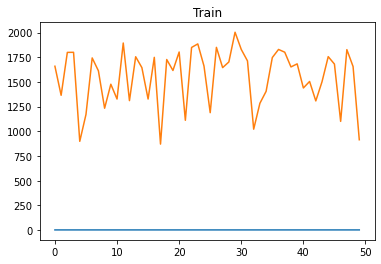

2/2 [==============================] - 2s 5ms/step


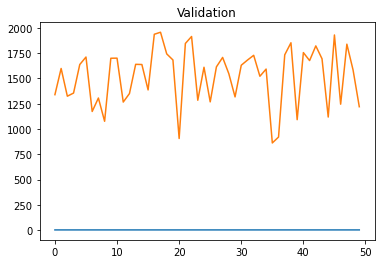

3/3 [==============================] - 0s 29ms/step


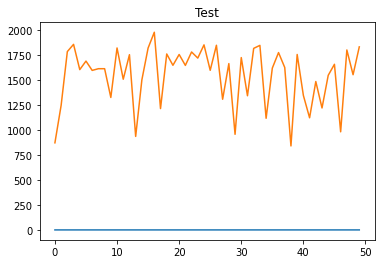

3/3 [==============================] - 0s 4ms/step


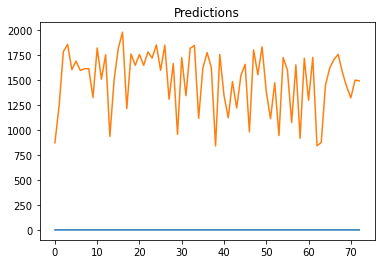

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
4/8 [==============>...............] - ETA: 0s - loss: 2404551.2500 - root_mean_squared_error: 1550.6615 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 2s/step - loss: 2420629.0000 - root_mean_squared_error: 1555.8370 - val_loss: 2407498.0000 - val_root_mean_squared_error: 1551.6115
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2420490.7500 - root_mean_squared_error: 1555.7926

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2420490.7500 - root_mean_squared_error: 1555.7926 - val_loss: 2407345.5000 - val_root_mean_squared_error: 1551.5623
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 2393417.5000 - root_mean_squared_error: 1547.0674

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2420314.2500 - root_mean_squared_error: 1555.7360 - val_loss: 2407144.2500 - val_root_mean_squared_error: 1551.4974
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2453006.2500 - root_mean_squared_error: 1566.2076

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2420095.2500 - root_mean_squared_error: 1555.6655 - val_loss: 2406814.5000 - val_root_mean_squared_error: 1551.3911
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2419389.5000 - root_mean_squared_error: 1555.4387

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2419389.5000 - root_mean_squared_error: 1555.4387 - val_loss: 2405569.7500 - val_root_mean_squared_error: 1550.9899
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2434727.0000 - root_mean_squared_error: 1560.3612

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2418335.0000 - root_mean_squared_error: 1555.0997 - val_loss: 2404874.5000 - val_root_mean_squared_error: 1550.7657
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2408408.2500 - root_mean_squared_error: 1551.9047

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2417732.7500 - root_mean_squared_error: 1554.9060 - val_loss: 2404412.7500 - val_root_mean_squared_error: 1550.6169
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2410870.0000 - root_mean_squared_error: 1552.6976

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2417447.2500 - root_mean_squared_error: 1554.8142 - val_loss: 2404361.7500 - val_root_mean_squared_error: 1550.6006
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2373026.2500 - root_mean_squared_error: 1540.4630

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2417398.2500 - root_mean_squared_error: 1554.7985 - val_loss: 2404314.5000 - val_root_mean_squared_error: 1550.5852
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2418924.7500 - root_mean_squared_error: 1555.2893

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2417354.2500 - root_mean_squared_error: 1554.7843 - val_loss: 2404272.5000 - val_root_mean_squared_error: 1550.5717
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2458368.2500 - root_mean_squared_error: 1567.9185

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2417313.2500 - root_mean_squared_error: 1554.7711 - val_loss: 2404232.5000 - val_root_mean_squared_error: 1550.5587
Epoch 12/50
4/8 [==============>...............] - ETA: 0s - loss: 2481235.0000 - root_mean_squared_error: 1575.1936

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2417272.7500 - root_mean_squared_error: 1554.7581 - val_loss: 2404192.2500 - val_root_mean_squared_error: 1550.5458
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2428321.5000 - root_mean_squared_error: 1558.3073

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2417232.0000 - root_mean_squared_error: 1554.7450 - val_loss: 2404150.5000 - val_root_mean_squared_error: 1550.5323
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2436394.5000 - root_mean_squared_error: 1560.8954

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2417190.2500 - root_mean_squared_error: 1554.7316 - val_loss: 2404106.5000 - val_root_mean_squared_error: 1550.5182
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2229767.0000 - root_mean_squared_error: 1493.2405

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2417143.7500 - root_mean_squared_error: 1554.7167 - val_loss: 2404054.2500 - val_root_mean_squared_error: 1550.5013
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2328870.0000 - root_mean_squared_error: 1526.0636

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2417083.5000 - root_mean_squared_error: 1554.6973 - val_loss: 2403975.0000 - val_root_mean_squared_error: 1550.4758
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2389108.5000 - root_mean_squared_error: 1545.6741

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2416958.5000 - root_mean_squared_error: 1554.6570 - val_loss: 2403723.0000 - val_root_mean_squared_error: 1550.3944
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2436375.7500 - root_mean_squared_error: 1560.8894

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2416632.5000 - root_mean_squared_error: 1554.5522 - val_loss: 2403412.7500 - val_root_mean_squared_error: 1550.2944
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2375654.5000 - root_mean_squared_error: 1541.3158

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2416427.2500 - root_mean_squared_error: 1554.4862 - val_loss: 2403316.5000 - val_root_mean_squared_error: 1550.2633
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 2372466.5000 - root_mean_squared_error: 1540.2812

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2416349.2500 - root_mean_squared_error: 1554.4611 - val_loss: 2403252.5000 - val_root_mean_squared_error: 1550.2427
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2692739.0000 - root_mean_squared_error: 1640.9568

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2416288.7500 - root_mean_squared_error: 1554.4417 - val_loss: 2403194.0000 - val_root_mean_squared_error: 1550.2239
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2416230.5000 - root_mean_squared_error: 1554.4229

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2416230.5000 - root_mean_squared_error: 1554.4229 - val_loss: 2403136.0000 - val_root_mean_squared_error: 1550.2052
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2386259.2500 - root_mean_squared_error: 1544.7522

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2416172.0000 - root_mean_squared_error: 1554.4041 - val_loss: 2403071.0000 - val_root_mean_squared_error: 1550.1841
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2393711.0000 - root_mean_squared_error: 1547.1622

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2416081.5000 - root_mean_squared_error: 1554.3750 - val_loss: 2402960.2500 - val_root_mean_squared_error: 1550.1484
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2415999.7500 - root_mean_squared_error: 1554.3486

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2415999.7500 - root_mean_squared_error: 1554.3486 - val_loss: 2402912.0000 - val_root_mean_squared_error: 1550.1329
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2302779.5000 - root_mean_squared_error: 1517.4912

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2415953.7500 - root_mean_squared_error: 1554.3339 - val_loss: 2402867.0000 - val_root_mean_squared_error: 1550.1184
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2264193.0000 - root_mean_squared_error: 1504.7235

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415908.5000 - root_mean_squared_error: 1554.3193 - val_loss: 2402821.2500 - val_root_mean_squared_error: 1550.1036
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2417349.7500 - root_mean_squared_error: 1554.7828

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2415863.2500 - root_mean_squared_error: 1554.3047 - val_loss: 2402775.5000 - val_root_mean_squared_error: 1550.0889
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2437629.7500 - root_mean_squared_error: 1561.2910

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2415816.7500 - root_mean_squared_error: 1554.2898 - val_loss: 2402729.0000 - val_root_mean_squared_error: 1550.0739
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2434560.2500 - root_mean_squared_error: 1560.3077

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2415770.7500 - root_mean_squared_error: 1554.2750 - val_loss: 2402683.0000 - val_root_mean_squared_error: 1550.0591
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2408762.5000 - root_mean_squared_error: 1552.0188

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2415725.0000 - root_mean_squared_error: 1554.2603 - val_loss: 2402636.5000 - val_root_mean_squared_error: 1550.0441
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2415678.2500 - root_mean_squared_error: 1554.2452

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2415678.2500 - root_mean_squared_error: 1554.2452 - val_loss: 2402589.5000 - val_root_mean_squared_error: 1550.0289
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2425085.5000 - root_mean_squared_error: 1557.2686

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415631.2500 - root_mean_squared_error: 1554.2301 - val_loss: 2402542.0000 - val_root_mean_squared_error: 1550.0135
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2528259.0000 - root_mean_squared_error: 1590.0500

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2415582.2500 - root_mean_squared_error: 1554.2144 - val_loss: 2402485.2500 - val_root_mean_squared_error: 1549.9952
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2413729.7500 - root_mean_squared_error: 1553.6183

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415499.2500 - root_mean_squared_error: 1554.1876 - val_loss: 2402352.0000 - val_root_mean_squared_error: 1549.9523
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2133229.2500 - root_mean_squared_error: 1460.5579

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2415386.7500 - root_mean_squared_error: 1554.1515 - val_loss: 2402293.0000 - val_root_mean_squared_error: 1549.9332
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2415334.5000 - root_mean_squared_error: 1554.1346

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2415334.5000 - root_mean_squared_error: 1554.1346 - val_loss: 2402242.7500 - val_root_mean_squared_error: 1549.9170
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2400316.7500 - root_mean_squared_error: 1549.2955

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2415284.0000 - root_mean_squared_error: 1554.1184 - val_loss: 2402192.0000 - val_root_mean_squared_error: 1549.9006
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2415233.0000 - root_mean_squared_error: 1554.1021

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415233.0000 - root_mean_squared_error: 1554.1021 - val_loss: 2402141.2500 - val_root_mean_squared_error: 1549.8843
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2331258.2500 - root_mean_squared_error: 1526.8458

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415181.7500 - root_mean_squared_error: 1554.0854 - val_loss: 2402089.7500 - val_root_mean_squared_error: 1549.8677
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2329484.5000 - root_mean_squared_error: 1526.2649

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2415130.2500 - root_mean_squared_error: 1554.0690 - val_loss: 2402037.7500 - val_root_mean_squared_error: 1549.8508
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2406304.2500 - root_mean_squared_error: 1551.2267

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2415078.7500 - root_mean_squared_error: 1554.0524 - val_loss: 2401985.7500 - val_root_mean_squared_error: 1549.8341
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2060014.8750 - root_mean_squared_error: 1435.2751

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415026.5000 - root_mean_squared_error: 1554.0355 - val_loss: 2401933.0000 - val_root_mean_squared_error: 1549.8171
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2419738.7500 - root_mean_squared_error: 1555.5509

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2414974.0000 - root_mean_squared_error: 1554.0187 - val_loss: 2401880.0000 - val_root_mean_squared_error: 1549.7999
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2414920.5000 - root_mean_squared_error: 1554.0015

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2414920.5000 - root_mean_squared_error: 1554.0015 - val_loss: 2401826.7500 - val_root_mean_squared_error: 1549.7828
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 2626091.5000 - root_mean_squared_error: 1620.5220

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2414867.7500 - root_mean_squared_error: 1553.9845 - val_loss: 2401773.0000 - val_root_mean_squared_error: 1549.7655
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2447435.0000 - root_mean_squared_error: 1564.4280

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2414814.0000 - root_mean_squared_error: 1553.9672 - val_loss: 2401718.5000 - val_root_mean_squared_error: 1549.7479
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2394157.2500 - root_mean_squared_error: 1547.3064

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2414759.2500 - root_mean_squared_error: 1553.9496 - val_loss: 2401664.0000 - val_root_mean_squared_error: 1549.7303
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2414704.7500 - root_mean_squared_error: 1553.9320

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2414704.7500 - root_mean_squared_error: 1553.9320 - val_loss: 2401609.0000 - val_root_mean_squared_error: 1549.7125
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2455676.2500 - root_mean_squared_error: 1567.0597

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 1s 5ms/step


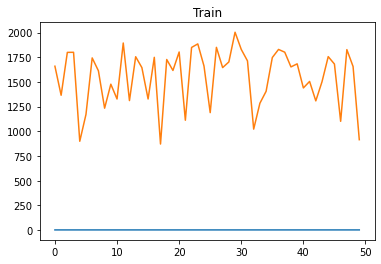

2/2 [==============================] - 1s 8ms/step


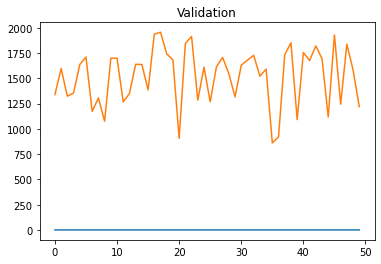

3/3 [==============================] - 0s 4ms/step


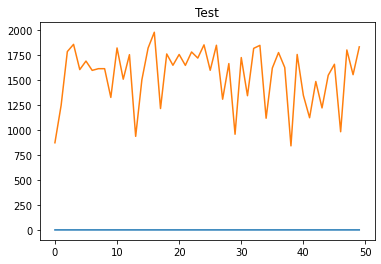

3/3 [==============================] - 0s 4ms/step


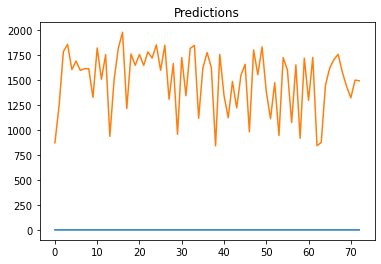

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2420252.0000 - root_mean_squared_error: 1555.7159 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 656ms/step - loss: 2420252.0000 - root_mean_squared_error: 1555.7159 - val_loss: 2406944.2500 - val_root_mean_squared_error: 1551.4330
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2415589.7500 - root_mean_squared_error: 1554.2168INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 707ms/step - loss: 2419906.5000 - root_mean_squared_error: 1555.6049 - val_loss: 2406739.7500 - val_root_mean_squared_error: 1551.3671
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 2415600.5000 - root_mean_squared_error: 1554.2202INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 585ms/step - loss: 2419724.0000 - root_mean_squared_error: 1555.5463 - val_loss: 2406572.7500 - val_root_mean_squared_error: 1551.3134
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 2220687.5000 - root_mean_squared_error: 1490.1971INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 617ms/step - loss: 2419560.5000 - root_mean_squared_error: 1555.4937 - val_loss: 2406411.5000 - val_root_mean_squared_error: 1551.2612
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2420260.7500 - root_mean_squared_error: 1555.7188INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 729ms/step - loss: 2419400.5000 - root_mean_squared_error: 1555.4423 - val_loss: 2406252.2500 - val_root_mean_squared_error: 1551.2100
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2412701.7500 - root_mean_squared_error: 1553.2874INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 795ms/step - loss: 2419242.0000 - root_mean_squared_error: 1555.3912 - val_loss: 2406094.0000 - val_root_mean_squared_error: 1551.1589
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 2447325.0000 - root_mean_squared_error: 1564.3928INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 746ms/step - loss: 2419084.7500 - root_mean_squared_error: 1555.3407 - val_loss: 2405935.7500 - val_root_mean_squared_error: 1551.1079
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2401965.5000 - root_mean_squared_error: 1549.8275INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 688ms/step - loss: 2418926.7500 - root_mean_squared_error: 1555.2899 - val_loss: 2405778.0000 - val_root_mean_squared_error: 1551.0570
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2422949.2500 - root_mean_squared_error: 1556.5825INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 704ms/step - loss: 2418769.5000 - root_mean_squared_error: 1555.2394 - val_loss: 2405620.5000 - val_root_mean_squared_error: 1551.0062
Epoch 10/50
3/8 [==========>...................] - ETA: 0s - loss: 2461422.5000 - root_mean_squared_error: 1568.8921INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 758ms/step - loss: 2418611.7500 - root_mean_squared_error: 1555.1886 - val_loss: 2405462.5000 - val_root_mean_squared_error: 1550.9553
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 2385206.0000 - root_mean_squared_error: 1544.4113INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 582ms/step - loss: 2418453.5000 - root_mean_squared_error: 1555.1378 - val_loss: 2405304.2500 - val_root_mean_squared_error: 1550.9043
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2418296.0000 - root_mean_squared_error: 1555.0872INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 690ms/step - loss: 2418296.0000 - root_mean_squared_error: 1555.0872 - val_loss: 2405144.7500 - val_root_mean_squared_error: 1550.8529
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2409974.5000 - root_mean_squared_error: 1552.4093INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 725ms/step - loss: 2418137.0000 - root_mean_squared_error: 1555.0360 - val_loss: 2404986.5000 - val_root_mean_squared_error: 1550.8019
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2306403.0000 - root_mean_squared_error: 1518.6846INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 717ms/step - loss: 2417978.2500 - root_mean_squared_error: 1554.9850 - val_loss: 2404828.2500 - val_root_mean_squared_error: 1550.7507
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2398953.2500 - root_mean_squared_error: 1548.8555INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 674ms/step - loss: 2417820.5000 - root_mean_squared_error: 1554.9342 - val_loss: 2404669.5000 - val_root_mean_squared_error: 1550.6997
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2225438.7500 - root_mean_squared_error: 1491.7904INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 597ms/step - loss: 2417661.0000 - root_mean_squared_error: 1554.8829 - val_loss: 2404510.2500 - val_root_mean_squared_error: 1550.6483
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2417503.5000 - root_mean_squared_error: 1554.8323INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 666ms/step - loss: 2417503.5000 - root_mean_squared_error: 1554.8323 - val_loss: 2404351.0000 - val_root_mean_squared_error: 1550.5969
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2426220.2500 - root_mean_squared_error: 1557.6329INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 780ms/step - loss: 2417344.0000 - root_mean_squared_error: 1554.7810 - val_loss: 2404192.2500 - val_root_mean_squared_error: 1550.5458
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2162003.5000 - root_mean_squared_error: 1470.3752INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 827ms/step - loss: 2417185.7500 - root_mean_squared_error: 1554.7301 - val_loss: 2404034.2500 - val_root_mean_squared_error: 1550.4949
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2417029.0000 - root_mean_squared_error: 1554.6797INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 769ms/step - loss: 2417029.0000 - root_mean_squared_error: 1554.6797 - val_loss: 2403875.0000 - val_root_mean_squared_error: 1550.4435
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2408364.7500 - root_mean_squared_error: 1551.8907INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 706ms/step - loss: 2416869.5000 - root_mean_squared_error: 1554.6284 - val_loss: 2403716.5000 - val_root_mean_squared_error: 1550.3923
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2391025.0000 - root_mean_squared_error: 1546.2939INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 625ms/step - loss: 2416711.5000 - root_mean_squared_error: 1554.5776 - val_loss: 2403557.5000 - val_root_mean_squared_error: 1550.3411
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2337130.0000 - root_mean_squared_error: 1528.7675INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 746ms/step - loss: 2416552.7500 - root_mean_squared_error: 1554.5265 - val_loss: 2403399.5000 - val_root_mean_squared_error: 1550.2902
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2555866.7500 - root_mean_squared_error: 1598.7079INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 558ms/step - loss: 2416395.7500 - root_mean_squared_error: 1554.4761 - val_loss: 2403240.7500 - val_root_mean_squared_error: 1550.2389
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2401766.2500 - root_mean_squared_error: 1549.7633INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 777ms/step - loss: 2416237.0000 - root_mean_squared_error: 1554.4249 - val_loss: 2403082.2500 - val_root_mean_squared_error: 1550.1879
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2420112.2500 - root_mean_squared_error: 1555.6710INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 2416078.5000 - root_mean_squared_error: 1554.3740 - val_loss: 2402922.7500 - val_root_mean_squared_error: 1550.1364
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2295791.0000 - root_mean_squared_error: 1515.1868INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 752ms/step - loss: 2415920.7500 - root_mean_squared_error: 1554.3232 - val_loss: 2402764.2500 - val_root_mean_squared_error: 1550.0852
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2479025.5000 - root_mean_squared_error: 1574.4922INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 685ms/step - loss: 2415762.2500 - root_mean_squared_error: 1554.2722 - val_loss: 2402607.0000 - val_root_mean_squared_error: 1550.0345
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2280503.0000 - root_mean_squared_error: 1510.1334INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 462ms/step - loss: 2415605.2500 - root_mean_squared_error: 1554.2218 - val_loss: 2402449.0000 - val_root_mean_squared_error: 1549.9835
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2333606.0000 - root_mean_squared_error: 1527.6145INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 578ms/step - loss: 2415448.7500 - root_mean_squared_error: 1554.1714 - val_loss: 2402292.7500 - val_root_mean_squared_error: 1549.9331
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2391133.0000 - root_mean_squared_error: 1546.3289INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 605ms/step - loss: 2415291.5000 - root_mean_squared_error: 1554.1208 - val_loss: 2402134.5000 - val_root_mean_squared_error: 1549.8821
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2165236.7500 - root_mean_squared_error: 1471.4744INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 590ms/step - loss: 2415132.7500 - root_mean_squared_error: 1554.0697 - val_loss: 2401977.0000 - val_root_mean_squared_error: 1549.8313
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2387946.7500 - root_mean_squared_error: 1545.2982INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 437ms/step - loss: 2414976.0000 - root_mean_squared_error: 1554.0193 - val_loss: 2401818.5000 - val_root_mean_squared_error: 1549.7802
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2514938.2500 - root_mean_squared_error: 1585.8557INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 434ms/step - loss: 2414817.5000 - root_mean_squared_error: 1553.9683 - val_loss: 2401659.0000 - val_root_mean_squared_error: 1549.7286
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2233746.5000 - root_mean_squared_error: 1494.5724INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 698ms/step - loss: 2414658.2500 - root_mean_squared_error: 1553.9171 - val_loss: 2401501.0000 - val_root_mean_squared_error: 1549.6777
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2495895.0000 - root_mean_squared_error: 1579.8402INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 628ms/step - loss: 2414499.7500 - root_mean_squared_error: 1553.8661 - val_loss: 2401341.2500 - val_root_mean_squared_error: 1549.6262
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2404259.5000 - root_mean_squared_error: 1550.5675INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 666ms/step - loss: 2414341.0000 - root_mean_squared_error: 1553.8149 - val_loss: 2401181.7500 - val_root_mean_squared_error: 1549.5747
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2424074.7500 - root_mean_squared_error: 1556.9441INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 558ms/step - loss: 2414183.2500 - root_mean_squared_error: 1553.7642 - val_loss: 2401022.5000 - val_root_mean_squared_error: 1549.5233
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2217344.0000 - root_mean_squared_error: 1489.0748INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 648ms/step - loss: 2414023.7500 - root_mean_squared_error: 1553.7129 - val_loss: 2400865.5000 - val_root_mean_squared_error: 1549.4725
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 2363166.7500 - root_mean_squared_error: 1537.2595INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 804ms/step - loss: 2413867.2500 - root_mean_squared_error: 1553.6625 - val_loss: 2400707.0000 - val_root_mean_squared_error: 1549.4215
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2488576.5000 - root_mean_squared_error: 1577.5222INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 623ms/step - loss: 2413710.2500 - root_mean_squared_error: 1553.6121 - val_loss: 2400549.5000 - val_root_mean_squared_error: 1549.3707
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2413552.0000 - root_mean_squared_error: 1553.5610INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 639ms/step - loss: 2413552.0000 - root_mean_squared_error: 1553.5610 - val_loss: 2400392.7500 - val_root_mean_squared_error: 1549.3201
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2428192.7500 - root_mean_squared_error: 1558.2660INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 659ms/step - loss: 2413395.7500 - root_mean_squared_error: 1553.5107 - val_loss: 2400234.7500 - val_root_mean_squared_error: 1549.2690
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2311678.0000 - root_mean_squared_error: 1520.4203INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 690ms/step - loss: 2413238.0000 - root_mean_squared_error: 1553.4600 - val_loss: 2400076.7500 - val_root_mean_squared_error: 1549.2181
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2281004.7500 - root_mean_squared_error: 1510.2996INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 738ms/step - loss: 2413079.7500 - root_mean_squared_error: 1553.4091 - val_loss: 2399919.0000 - val_root_mean_squared_error: 1549.1672
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 2443976.5000 - root_mean_squared_error: 1563.3223INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 735ms/step - loss: 2412922.7500 - root_mean_squared_error: 1553.3585 - val_loss: 2399760.0000 - val_root_mean_squared_error: 1549.1158
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2579267.2500 - root_mean_squared_error: 1606.0098INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 654ms/step - loss: 2412764.0000 - root_mean_squared_error: 1553.3075 - val_loss: 2399601.7500 - val_root_mean_squared_error: 1549.0648
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2506183.0000 - root_mean_squared_error: 1583.0929INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 822ms/step - loss: 2412606.5000 - root_mean_squared_error: 1553.2567 - val_loss: 2399442.7500 - val_root_mean_squared_error: 1549.0134
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2455338.5000 - root_mean_squared_error: 1566.9520INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 578ms/step - loss: 2412447.5000 - root_mean_squared_error: 1553.2056 - val_loss: 2399283.5000 - val_root_mean_squared_error: 1548.9620
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2407385.5000 - root_mean_squared_error: 1551.5752INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 0s 3ms/step


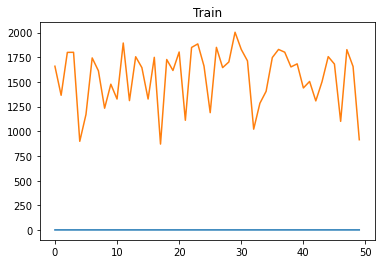

2/2 [==============================] - 1s 6ms/step


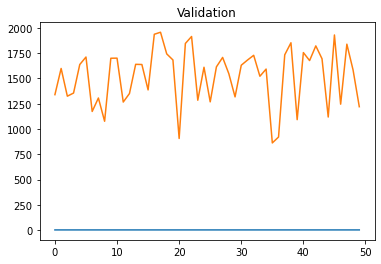

3/3 [==============================] - 0s 4ms/step


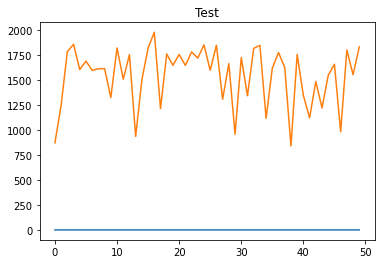

3/3 [==============================] - 0s 4ms/step


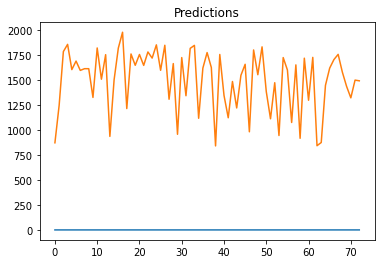

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2994037.5000 - root_mean_squared_error: 1730.3287 

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 649ms/step - loss: 2994037.5000 - root_mean_squared_error: 1730.3287 - val_loss: 2940525.5000 - val_root_mean_squared_error: 1714.7960
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2904989.2500 - root_mean_squared_error: 1704.4030

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 268ms/step - loss: 2911411.2500 - root_mean_squared_error: 1706.2858 - val_loss: 2857549.2500 - val_root_mean_squared_error: 1690.4287
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2816138.2500 - root_mean_squared_error: 1678.1354

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 294ms/step - loss: 2830773.0000 - root_mean_squared_error: 1682.4901 - val_loss: 2776778.5000 - val_root_mean_squared_error: 1666.3668
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2745712.0000 - root_mean_squared_error: 1657.0190

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 309ms/step - loss: 2752737.2500 - root_mean_squared_error: 1659.1375 - val_loss: 2698050.2500 - val_root_mean_squared_error: 1642.5742
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2676908.5000 - root_mean_squared_error: 1636.1261

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 301ms/step - loss: 2676908.5000 - root_mean_squared_error: 1636.1261 - val_loss: 2620652.2500 - val_root_mean_squared_error: 1618.8429
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2554638.7500 - root_mean_squared_error: 1598.3237

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 322ms/step - loss: 2601511.5000 - root_mean_squared_error: 1612.9202 - val_loss: 2545259.0000 - val_root_mean_squared_error: 1595.3868
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2527650.5000 - root_mean_squared_error: 1589.8586

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 262ms/step - loss: 2527650.5000 - root_mean_squared_error: 1589.8586 - val_loss: 2471383.2500 - val_root_mean_squared_error: 1572.0634
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2456399.2500 - root_mean_squared_error: 1567.2904

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 249ms/step - loss: 2456399.2500 - root_mean_squared_error: 1567.2904 - val_loss: 2398459.2500 - val_root_mean_squared_error: 1548.6959
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 2538563.5000 - root_mean_squared_error: 1593.2870

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 316ms/step - loss: 2386297.5000 - root_mean_squared_error: 1544.7645 - val_loss: 2327224.7500 - val_root_mean_squared_error: 1525.5244
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2313928.0000 - root_mean_squared_error: 1521.1600

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 492ms/step - loss: 2316389.5000 - root_mean_squared_error: 1521.9690 - val_loss: 2257724.0000 - val_root_mean_squared_error: 1502.5724
Epoch 11/50
4/8 [==============>...............] - ETA: 0s - loss: 2357605.0000 - root_mean_squared_error: 1535.4495

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 352ms/step - loss: 2249004.7500 - root_mean_squared_error: 1499.6682 - val_loss: 2188613.7500 - val_root_mean_squared_error: 1479.3964
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 2406733.5000 - root_mean_squared_error: 1551.3650

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 352ms/step - loss: 2182988.7500 - root_mean_squared_error: 1477.4940 - val_loss: 2140452.7500 - val_root_mean_squared_error: 1463.0286
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2176612.0000 - root_mean_squared_error: 1475.3346

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 443ms/step - loss: 2154515.7500 - root_mean_squared_error: 1467.8269 - val_loss: 2124962.7500 - val_root_mean_squared_error: 1457.7251
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2134969.7500 - root_mean_squared_error: 1461.1536

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 443ms/step - loss: 2139123.7500 - root_mean_squared_error: 1462.5743 - val_loss: 2108846.2500 - val_root_mean_squared_error: 1452.1868
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2027645.8750 - root_mean_squared_error: 1423.9543

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 362ms/step - loss: 2123052.2500 - root_mean_squared_error: 1457.0697 - val_loss: 2092160.8750 - val_root_mean_squared_error: 1446.4304
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2298150.5000 - root_mean_squared_error: 1515.9652

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 426ms/step - loss: 2106577.7500 - root_mean_squared_error: 1451.4054 - val_loss: 2074883.1250 - val_root_mean_squared_error: 1440.4454
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2082934.5000 - root_mean_squared_error: 1443.2375

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 380ms/step - loss: 2089539.8750 - root_mean_squared_error: 1445.5240 - val_loss: 2057189.5000 - val_root_mean_squared_error: 1434.2906
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2070250.2500 - root_mean_squared_error: 1438.8364

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 411ms/step - loss: 2072057.0000 - root_mean_squared_error: 1439.4641 - val_loss: 2039190.6250 - val_root_mean_squared_error: 1428.0023
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2184473.2500 - root_mean_squared_error: 1477.9963

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 325ms/step - loss: 2054200.6250 - root_mean_squared_error: 1433.2483 - val_loss: 2020421.2500 - val_root_mean_squared_error: 1421.4153
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2202527.5000 - root_mean_squared_error: 1484.0914

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 252ms/step - loss: 2035568.2500 - root_mean_squared_error: 1426.7334 - val_loss: 2000989.0000 - val_root_mean_squared_error: 1414.5632
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 1668585.0000 - root_mean_squared_error: 1291.7372

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 384ms/step - loss: 2016381.3750 - root_mean_squared_error: 1419.9934 - val_loss: 1981149.5000 - val_root_mean_squared_error: 1407.5331
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2232387.7500 - root_mean_squared_error: 1494.1177

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 301ms/step - loss: 1996872.6250 - root_mean_squared_error: 1413.1074 - val_loss: 1960613.0000 - val_root_mean_squared_error: 1400.2189
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 1858222.2500 - root_mean_squared_error: 1363.1663

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 210ms/step - loss: 1976533.1250 - root_mean_squared_error: 1405.8923 - val_loss: 1939690.8750 - val_root_mean_squared_error: 1392.7279
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 1955726.1250 - root_mean_squared_error: 1398.4728

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 326ms/step - loss: 1955726.1250 - root_mean_squared_error: 1398.4728 - val_loss: 1918182.1250 - val_root_mean_squared_error: 1384.9845
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 1922496.0000 - root_mean_squared_error: 1386.5410

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 370ms/step - loss: 1934464.8750 - root_mean_squared_error: 1390.8505 - val_loss: 1896129.8750 - val_root_mean_squared_error: 1377.0004
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 1920085.3750 - root_mean_squared_error: 1385.6715

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 407ms/step - loss: 1912829.1250 - root_mean_squared_error: 1383.0507 - val_loss: 1873488.5000 - val_root_mean_squared_error: 1368.7544
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 1992089.2500 - root_mean_squared_error: 1411.4139

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 229ms/step - loss: 1890595.6250 - root_mean_squared_error: 1374.9893 - val_loss: 1850364.1250 - val_root_mean_squared_error: 1360.2809
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 1893908.7500 - root_mean_squared_error: 1376.1936

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 279ms/step - loss: 1867704.8750 - root_mean_squared_error: 1366.6400 - val_loss: 1826884.7500 - val_root_mean_squared_error: 1351.6230
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 1826020.1250 - root_mean_squared_error: 1351.3031

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 288ms/step - loss: 1844429.7500 - root_mean_squared_error: 1358.0979 - val_loss: 1802742.7500 - val_root_mean_squared_error: 1342.6626
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 1838127.5000 - root_mean_squared_error: 1355.7756

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 321ms/step - loss: 1820767.6250 - root_mean_squared_error: 1349.3583 - val_loss: 1778200.0000 - val_root_mean_squared_error: 1333.4917
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 1680977.0000 - root_mean_squared_error: 1296.5250

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 253ms/step - loss: 1796510.3750 - root_mean_squared_error: 1340.3396 - val_loss: 1753241.7500 - val_root_mean_squared_error: 1324.1003
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 1956119.2500 - root_mean_squared_error: 1398.6133

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 325ms/step - loss: 1771946.8750 - root_mean_squared_error: 1331.1449 - val_loss: 1727726.7500 - val_root_mean_squared_error: 1314.4302
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 1746517.0000 - root_mean_squared_error: 1321.5586

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 282ms/step - loss: 1746517.0000 - root_mean_squared_error: 1321.5586 - val_loss: 1701299.0000 - val_root_mean_squared_error: 1304.3385
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 1720349.2500 - root_mean_squared_error: 1311.6208

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 353ms/step - loss: 1720349.2500 - root_mean_squared_error: 1311.6208 - val_loss: 1674519.6250 - val_root_mean_squared_error: 1294.0323
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 1844515.1250 - root_mean_squared_error: 1358.1293

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 381ms/step - loss: 1694010.1250 - root_mean_squared_error: 1301.5414 - val_loss: 1646863.7500 - val_root_mean_squared_error: 1283.3019
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 1636349.0000 - root_mean_squared_error: 1279.1986

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 314ms/step - loss: 1666659.5000 - root_mean_squared_error: 1290.9917 - val_loss: 1619207.6250 - val_root_mean_squared_error: 1272.4808
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 1539770.5000 - root_mean_squared_error: 1240.8749

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 378ms/step - loss: 1639595.7500 - root_mean_squared_error: 1280.4670 - val_loss: 1590807.1250 - val_root_mean_squared_error: 1261.2720
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 1754149.6250 - root_mean_squared_error: 1324.4431

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 465ms/step - loss: 1611838.0000 - root_mean_squared_error: 1269.5818 - val_loss: 1562133.5000 - val_root_mean_squared_error: 1249.8534
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 1583454.6250 - root_mean_squared_error: 1258.3539

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 360ms/step - loss: 1583454.6250 - root_mean_squared_error: 1258.3539 - val_loss: 1532744.8750 - val_root_mean_squared_error: 1238.0408
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 1554512.8750 - root_mean_squared_error: 1246.8010

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 319ms/step - loss: 1554512.8750 - root_mean_squared_error: 1246.8010 - val_loss: 1503046.8750 - val_root_mean_squared_error: 1225.9882
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 1444766.3750 - root_mean_squared_error: 1201.9844

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 317ms/step - loss: 1525335.3750 - root_mean_squared_error: 1235.0447 - val_loss: 1472954.8750 - val_root_mean_squared_error: 1213.6536
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 1495859.6250 - root_mean_squared_error: 1223.0533

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 269ms/step - loss: 1495695.0000 - root_mean_squared_error: 1222.9861 - val_loss: 1442660.1250 - val_root_mean_squared_error: 1201.1079
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 1460170.0000 - root_mean_squared_error: 1208.3750

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 306ms/step - loss: 1465988.0000 - root_mean_squared_error: 1210.7799 - val_loss: 1411631.1250 - val_root_mean_squared_error: 1188.1208
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 1629829.2500 - root_mean_squared_error: 1276.6477

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 477ms/step - loss: 1435516.8750 - root_mean_squared_error: 1198.1306 - val_loss: 1380080.8750 - val_root_mean_squared_error: 1174.7684
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 1401308.0000 - root_mean_squared_error: 1183.7686

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 236ms/step - loss: 1404585.6250 - root_mean_squared_error: 1185.1521 - val_loss: 1348936.5000 - val_root_mean_squared_error: 1161.4373
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 1519545.2500 - root_mean_squared_error: 1232.6984

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 275ms/step - loss: 1373975.3750 - root_mean_squared_error: 1172.1670 - val_loss: 1317191.1250 - val_root_mean_squared_error: 1147.6895
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 1506151.2500 - root_mean_squared_error: 1227.2535

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 256ms/step - loss: 1342847.5000 - root_mean_squared_error: 1158.8130 - val_loss: 1285011.6250 - val_root_mean_squared_error: 1133.5835
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 1351807.0000 - root_mean_squared_error: 1162.6724

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 372ms/step - loss: 1311156.1250 - root_mean_squared_error: 1145.0573 - val_loss: 1252748.7500 - val_root_mean_squared_error: 1119.2626
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 1316539.1250 - root_mean_squared_error: 1147.4054

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 320ms/step - loss: 1279466.2500 - root_mean_squared_error: 1131.1349 - val_loss: 1220199.5000 - val_root_mean_squared_error: 1104.6265
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 1311358.2500 - root_mean_squared_error: 1145.1455

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 4ms/step


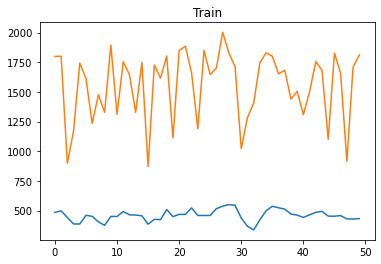

2/2 [==============================] - 0s 4ms/step


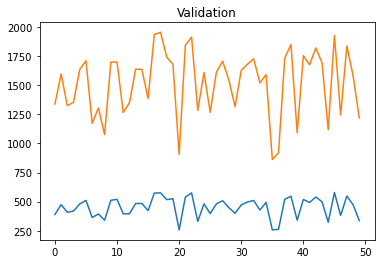

3/3 [==============================] - 0s 3ms/step


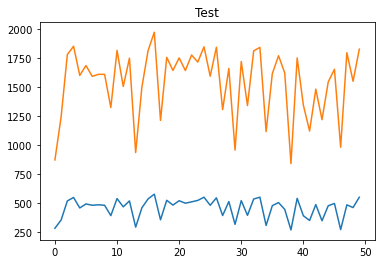

3/3 [==============================] - 0s 4ms/step


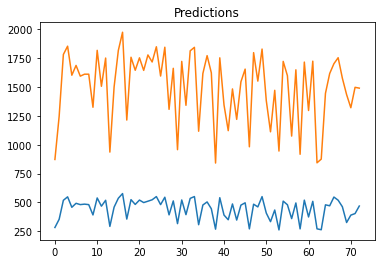

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2421565.0000 - root_mean_squared_error: 1556.1378

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 2s/step - loss: 2421565.0000 - root_mean_squared_error: 1556.1378 - val_loss: 2407457.7500 - val_root_mean_squared_error: 1551.5985
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2421415.7500 - root_mean_squared_error: 1556.0898

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2421415.7500 - root_mean_squared_error: 1556.0898 - val_loss: 2407274.0000 - val_root_mean_squared_error: 1551.5392
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2391107.5000 - root_mean_squared_error: 1546.3207

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2421127.2500 - root_mean_squared_error: 1555.9972 - val_loss: 2406767.2500 - val_root_mean_squared_error: 1551.3760
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2420567.7500 - root_mean_squared_error: 1555.8174

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2420556.0000 - root_mean_squared_error: 1555.8136 - val_loss: 2406215.7500 - val_root_mean_squared_error: 1551.1981
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 2444946.7500 - root_mean_squared_error: 1563.6326

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2420115.0000 - root_mean_squared_error: 1555.6719 - val_loss: 2405948.2500 - val_root_mean_squared_error: 1551.1119
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 2416523.5000 - root_mean_squared_error: 1554.5171

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2419906.7500 - root_mean_squared_error: 1555.6050 - val_loss: 2405781.5000 - val_root_mean_squared_error: 1551.0582
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2419693.7500 - root_mean_squared_error: 1555.5365

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2419693.7500 - root_mean_squared_error: 1555.5365 - val_loss: 2405416.0000 - val_root_mean_squared_error: 1550.9403
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2437052.7500 - root_mean_squared_error: 1561.1062

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2419119.5000 - root_mean_squared_error: 1555.3519 - val_loss: 2404631.2500 - val_root_mean_squared_error: 1550.6874
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2413103.2500 - root_mean_squared_error: 1553.4166

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2418544.0000 - root_mean_squared_error: 1555.1669 - val_loss: 2404429.7500 - val_root_mean_squared_error: 1550.6223
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2416455.2500 - root_mean_squared_error: 1554.4951

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2418404.5000 - root_mean_squared_error: 1555.1221 - val_loss: 2404274.7500 - val_root_mean_squared_error: 1550.5725
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2418418.0000 - root_mean_squared_error: 1555.1263

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2418143.2500 - root_mean_squared_error: 1555.0380 - val_loss: 2403758.5000 - val_root_mean_squared_error: 1550.4059
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2462478.7500 - root_mean_squared_error: 1569.2288

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2417565.0000 - root_mean_squared_error: 1554.8521 - val_loss: 2403379.0000 - val_root_mean_squared_error: 1550.2834
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2487569.0000 - root_mean_squared_error: 1577.2029

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2417370.5000 - root_mean_squared_error: 1554.7896 - val_loss: 2403299.0000 - val_root_mean_squared_error: 1550.2577
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2431338.7500 - root_mean_squared_error: 1559.2750

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2417294.0000 - root_mean_squared_error: 1554.7649 - val_loss: 2403225.5000 - val_root_mean_squared_error: 1550.2340
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2619309.2500 - root_mean_squared_error: 1618.4280

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2417221.0000 - root_mean_squared_error: 1554.7415 - val_loss: 2403152.5000 - val_root_mean_squared_error: 1550.2104
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 2440151.7500 - root_mean_squared_error: 1562.0985

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2417148.7500 - root_mean_squared_error: 1554.7183 - val_loss: 2403080.0000 - val_root_mean_squared_error: 1550.1871
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2419802.7500 - root_mean_squared_error: 1555.5715

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2417076.2500 - root_mean_squared_error: 1554.6949 - val_loss: 2403007.5000 - val_root_mean_squared_error: 1550.1638
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2391863.2500 - root_mean_squared_error: 1546.5649

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2417004.5000 - root_mean_squared_error: 1554.6719 - val_loss: 2402935.7500 - val_root_mean_squared_error: 1550.1405
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 2376296.0000 - root_mean_squared_error: 1541.5239

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2416932.5000 - root_mean_squared_error: 1554.6487 - val_loss: 2402864.0000 - val_root_mean_squared_error: 1550.1174
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2170641.7500 - root_mean_squared_error: 1473.3098

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2416860.7500 - root_mean_squared_error: 1554.6256 - val_loss: 2402792.2500 - val_root_mean_squared_error: 1550.0942
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2399800.7500 - root_mean_squared_error: 1549.1290

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2416789.5000 - root_mean_squared_error: 1554.6027 - val_loss: 2402721.0000 - val_root_mean_squared_error: 1550.0713
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2416719.2500 - root_mean_squared_error: 1554.5801

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2416719.2500 - root_mean_squared_error: 1554.5801 - val_loss: 2402650.2500 - val_root_mean_squared_error: 1550.0485
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2161021.0000 - root_mean_squared_error: 1470.0411

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2416648.5000 - root_mean_squared_error: 1554.5574 - val_loss: 2402579.5000 - val_root_mean_squared_error: 1550.0255
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2550593.5000 - root_mean_squared_error: 1597.0577

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2416578.2500 - root_mean_squared_error: 1554.5348 - val_loss: 2402508.7500 - val_root_mean_squared_error: 1550.0027
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2416507.2500 - root_mean_squared_error: 1554.5118

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2416507.2500 - root_mean_squared_error: 1554.5118 - val_loss: 2402438.0000 - val_root_mean_squared_error: 1549.9800
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2417038.5000 - root_mean_squared_error: 1554.6827

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2416437.0000 - root_mean_squared_error: 1554.4893 - val_loss: 2402367.5000 - val_root_mean_squared_error: 1549.9573
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2404210.0000 - root_mean_squared_error: 1550.5515

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2416366.0000 - root_mean_squared_error: 1554.4664 - val_loss: 2402291.2500 - val_root_mean_squared_error: 1549.9326
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2363584.2500 - root_mean_squared_error: 1537.3953

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 1s/step - loss: 2416280.2500 - root_mean_squared_error: 1554.4388 - val_loss: 2402199.0000 - val_root_mean_squared_error: 1549.9030
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2416195.2500 - root_mean_squared_error: 1554.4115

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2416195.2500 - root_mean_squared_error: 1554.4115 - val_loss: 2402120.7500 - val_root_mean_squared_error: 1549.8777
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2408782.0000 - root_mean_squared_error: 1552.0251

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2416117.7500 - root_mean_squared_error: 1554.3866 - val_loss: 2402043.0000 - val_root_mean_squared_error: 1549.8525
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2473726.0000 - root_mean_squared_error: 1572.8083

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2416040.5000 - root_mean_squared_error: 1554.3618 - val_loss: 2401966.2500 - val_root_mean_squared_error: 1549.8278
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2415965.0000 - root_mean_squared_error: 1554.3375

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2415965.0000 - root_mean_squared_error: 1554.3375 - val_loss: 2401890.5000 - val_root_mean_squared_error: 1549.8033
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2415889.0000 - root_mean_squared_error: 1554.3130

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2415889.0000 - root_mean_squared_error: 1554.3130 - val_loss: 2401815.2500 - val_root_mean_squared_error: 1549.7791
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2266689.0000 - root_mean_squared_error: 1505.5527

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2415814.2500 - root_mean_squared_error: 1554.2889 - val_loss: 2401740.5000 - val_root_mean_squared_error: 1549.7550
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2415739.5000 - root_mean_squared_error: 1554.2649

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2415739.5000 - root_mean_squared_error: 1554.2649 - val_loss: 2401665.5000 - val_root_mean_squared_error: 1549.7308
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 2377553.7500 - root_mean_squared_error: 1541.9319

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2415665.0000 - root_mean_squared_error: 1554.2410 - val_loss: 2401591.2500 - val_root_mean_squared_error: 1549.7069
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2415590.7500 - root_mean_squared_error: 1554.2170

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2415590.7500 - root_mean_squared_error: 1554.2170 - val_loss: 2401517.2500 - val_root_mean_squared_error: 1549.6830
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2577085.5000 - root_mean_squared_error: 1605.3303

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2415517.2500 - root_mean_squared_error: 1554.1935 - val_loss: 2401443.0000 - val_root_mean_squared_error: 1549.6589
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2415443.5000 - root_mean_squared_error: 1554.1697

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2415443.5000 - root_mean_squared_error: 1554.1697 - val_loss: 2401370.0000 - val_root_mean_squared_error: 1549.6355
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2566473.0000 - root_mean_squared_error: 1602.0215

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2415371.0000 - root_mean_squared_error: 1554.1464 - val_loss: 2401296.7500 - val_root_mean_squared_error: 1549.6117
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2422491.2500 - root_mean_squared_error: 1556.4354

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2415297.7500 - root_mean_squared_error: 1554.1228 - val_loss: 2401223.0000 - val_root_mean_squared_error: 1549.5880
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2415224.2500 - root_mean_squared_error: 1554.0991

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2415224.2500 - root_mean_squared_error: 1554.0991 - val_loss: 2401149.7500 - val_root_mean_squared_error: 1549.5643
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2427078.2500 - root_mean_squared_error: 1557.9083

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2415150.7500 - root_mean_squared_error: 1554.0756 - val_loss: 2401076.7500 - val_root_mean_squared_error: 1549.5408
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2415077.7500 - root_mean_squared_error: 1554.0520

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2415077.7500 - root_mean_squared_error: 1554.0520 - val_loss: 2401003.0000 - val_root_mean_squared_error: 1549.5170
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2413390.7500 - root_mean_squared_error: 1553.5092

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2415005.5000 - root_mean_squared_error: 1554.0288 - val_loss: 2400929.7500 - val_root_mean_squared_error: 1549.4934
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2410657.7500 - root_mean_squared_error: 1552.6293

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2414931.7500 - root_mean_squared_error: 1554.0051 - val_loss: 2400857.0000 - val_root_mean_squared_error: 1549.4698
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2408770.0000 - root_mean_squared_error: 1552.0212

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2414859.2500 - root_mean_squared_error: 1553.9817 - val_loss: 2400784.5000 - val_root_mean_squared_error: 1549.4465
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2539987.0000 - root_mean_squared_error: 1593.7336

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2414786.7500 - root_mean_squared_error: 1553.9584 - val_loss: 2400711.5000 - val_root_mean_squared_error: 1549.4231
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2354426.5000 - root_mean_squared_error: 1534.4141

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2414714.2500 - root_mean_squared_error: 1553.9351 - val_loss: 2400639.2500 - val_root_mean_squared_error: 1549.3997
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2204624.0000 - root_mean_squared_error: 1484.7976

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 5ms/step


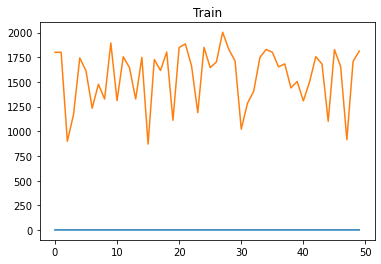

2/2 [==============================] - 1s 17ms/step


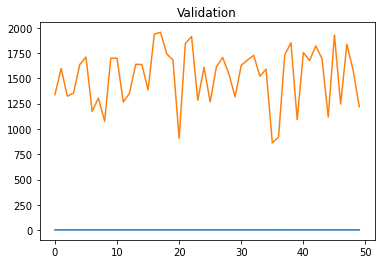

3/3 [==============================] - 0s 4ms/step


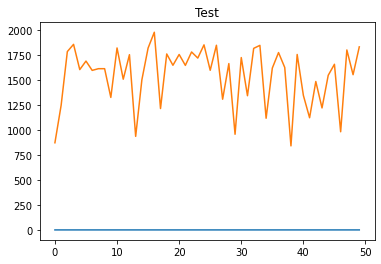

3/3 [==============================] - 0s 10ms/step


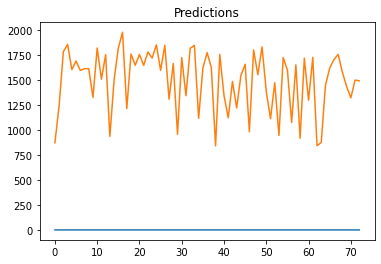

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2418111.2500 - root_mean_squared_error: 1555.0277  

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 3s/step - loss: 2418111.2500 - root_mean_squared_error: 1555.0277 - val_loss: 2403996.2500 - val_root_mean_squared_error: 1550.4825
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2455872.5000 - root_mean_squared_error: 1567.1223

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2417962.7500 - root_mean_squared_error: 1554.9800 - val_loss: 2403846.5000 - val_root_mean_squared_error: 1550.4343
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2417813.0000 - root_mean_squared_error: 1554.9319

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2417813.0000 - root_mean_squared_error: 1554.9319 - val_loss: 2403697.0000 - val_root_mean_squared_error: 1550.3861
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2417664.2500 - root_mean_squared_error: 1554.8840

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2417664.2500 - root_mean_squared_error: 1554.8840 - val_loss: 2403547.2500 - val_root_mean_squared_error: 1550.3378
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2417514.5000 - root_mean_squared_error: 1554.8358

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2417514.5000 - root_mean_squared_error: 1554.8358 - val_loss: 2403397.2500 - val_root_mean_squared_error: 1550.2894
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2388028.2500 - root_mean_squared_error: 1545.3246

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2417364.5000 - root_mean_squared_error: 1554.7876 - val_loss: 2403240.0000 - val_root_mean_squared_error: 1550.2386
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2417197.0000 - root_mean_squared_error: 1554.7338

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2417197.0000 - root_mean_squared_error: 1554.7338 - val_loss: 2403063.5000 - val_root_mean_squared_error: 1550.1818
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2420501.2500 - root_mean_squared_error: 1555.7960

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2417016.2500 - root_mean_squared_error: 1554.6757 - val_loss: 2402870.5000 - val_root_mean_squared_error: 1550.1195
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2445214.7500 - root_mean_squared_error: 1563.7183

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2416835.2500 - root_mean_squared_error: 1554.6174 - val_loss: 2402711.2500 - val_root_mean_squared_error: 1550.0681
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2419966.0000 - root_mean_squared_error: 1555.6240

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2416443.2500 - root_mean_squared_error: 1554.4913 - val_loss: 2401763.2500 - val_root_mean_squared_error: 1549.7623
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2415722.2500 - root_mean_squared_error: 1554.2594

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415722.2500 - root_mean_squared_error: 1554.2594 - val_loss: 2401588.5000 - val_root_mean_squared_error: 1549.7059
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2415554.0000 - root_mean_squared_error: 1554.2053

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2415554.0000 - root_mean_squared_error: 1554.2053 - val_loss: 2401421.2500 - val_root_mean_squared_error: 1549.6520
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2422831.7500 - root_mean_squared_error: 1556.5448

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415386.0000 - root_mean_squared_error: 1554.1512 - val_loss: 2401224.2500 - val_root_mean_squared_error: 1549.5884
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2412767.7500 - root_mean_squared_error: 1553.3086

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2414823.5000 - root_mean_squared_error: 1553.9702 - val_loss: 2400387.2500 - val_root_mean_squared_error: 1549.3184
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2414352.2500 - root_mean_squared_error: 1553.8186

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2414352.2500 - root_mean_squared_error: 1553.8186 - val_loss: 2400213.0000 - val_root_mean_squared_error: 1549.2621
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2529946.2500 - root_mean_squared_error: 1590.5804

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2414178.7500 - root_mean_squared_error: 1553.7628 - val_loss: 2400037.7500 - val_root_mean_squared_error: 1549.2056
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2414005.0000 - root_mean_squared_error: 1553.7069

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2414005.0000 - root_mean_squared_error: 1553.7069 - val_loss: 2399863.5000 - val_root_mean_squared_error: 1549.1493
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2413829.7500 - root_mean_squared_error: 1553.6505

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2413829.7500 - root_mean_squared_error: 1553.6505 - val_loss: 2399674.0000 - val_root_mean_squared_error: 1549.0883
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2413603.7500 - root_mean_squared_error: 1553.5778

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2413603.7500 - root_mean_squared_error: 1553.5778 - val_loss: 2399288.7500 - val_root_mean_squared_error: 1548.9637
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2459777.2500 - root_mean_squared_error: 1568.3677

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2412897.2500 - root_mean_squared_error: 1553.3503 - val_loss: 2398266.7500 - val_root_mean_squared_error: 1548.6338
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2426117.2500 - root_mean_squared_error: 1557.5999

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2412168.0000 - root_mean_squared_error: 1553.1156 - val_loss: 2397970.7500 - val_root_mean_squared_error: 1548.5382
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2433350.0000 - root_mean_squared_error: 1559.9199

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2411915.2500 - root_mean_squared_error: 1553.0342 - val_loss: 2397714.2500 - val_root_mean_squared_error: 1548.4554
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2416444.5000 - root_mean_squared_error: 1554.4917

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2411648.0000 - root_mean_squared_error: 1552.9481 - val_loss: 2397459.7500 - val_root_mean_squared_error: 1548.3733
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 2446209.5000 - root_mean_squared_error: 1564.0363

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2411419.5000 - root_mean_squared_error: 1552.8746 - val_loss: 2397251.7500 - val_root_mean_squared_error: 1548.3060
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2404746.2500 - root_mean_squared_error: 1550.7245

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2411200.5000 - root_mean_squared_error: 1552.8041 - val_loss: 2396968.2500 - val_root_mean_squared_error: 1548.2145
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2413210.7500 - root_mean_squared_error: 1553.4513

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2410758.7500 - root_mean_squared_error: 1552.6619 - val_loss: 2396279.7500 - val_root_mean_squared_error: 1547.9922
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2302517.5000 - root_mean_squared_error: 1517.4049

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2410191.2500 - root_mean_squared_error: 1552.4791 - val_loss: 2396007.2500 - val_root_mean_squared_error: 1547.9042
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2421201.2500 - root_mean_squared_error: 1556.0210

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2409983.0000 - root_mean_squared_error: 1552.4120 - val_loss: 2395840.0000 - val_root_mean_squared_error: 1547.8501
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2409450.2500 - root_mean_squared_error: 1552.2404

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2409819.7500 - root_mean_squared_error: 1552.3594 - val_loss: 2395679.0000 - val_root_mean_squared_error: 1547.7981
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2363302.0000 - root_mean_squared_error: 1537.3035

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2409660.0000 - root_mean_squared_error: 1552.3080 - val_loss: 2395519.0000 - val_root_mean_squared_error: 1547.7465
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2411584.0000 - root_mean_squared_error: 1552.9276

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2409501.0000 - root_mean_squared_error: 1552.2567 - val_loss: 2395361.0000 - val_root_mean_squared_error: 1547.6954
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2402960.7500 - root_mean_squared_error: 1550.1487

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2409343.5000 - root_mean_squared_error: 1552.2061 - val_loss: 2395202.7500 - val_root_mean_squared_error: 1547.6443
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2634678.2500 - root_mean_squared_error: 1623.1692

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2409185.0000 - root_mean_squared_error: 1552.1549 - val_loss: 2395043.7500 - val_root_mean_squared_error: 1547.5929
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2398164.2500 - root_mean_squared_error: 1548.6007

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2409025.7500 - root_mean_squared_error: 1552.1036 - val_loss: 2394877.5000 - val_root_mean_squared_error: 1547.5392
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2407996.2500 - root_mean_squared_error: 1551.7720

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2408836.5000 - root_mean_squared_error: 1552.0427 - val_loss: 2394614.0000 - val_root_mean_squared_error: 1547.4540
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2442580.2500 - root_mean_squared_error: 1562.8756

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2408567.2500 - root_mean_squared_error: 1551.9559 - val_loss: 2394411.0000 - val_root_mean_squared_error: 1547.3884
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2050637.5000 - root_mean_squared_error: 1432.0048

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2408392.7500 - root_mean_squared_error: 1551.8998 - val_loss: 2394249.0000 - val_root_mean_squared_error: 1547.3361
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2432427.2500 - root_mean_squared_error: 1559.6240

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2408232.7500 - root_mean_squared_error: 1551.8481 - val_loss: 2394086.5000 - val_root_mean_squared_error: 1547.2836
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2335778.5000 - root_mean_squared_error: 1528.3254

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2408070.5000 - root_mean_squared_error: 1551.7959 - val_loss: 2393926.5000 - val_root_mean_squared_error: 1547.2319
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2411258.0000 - root_mean_squared_error: 1552.8226

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2407911.2500 - root_mean_squared_error: 1551.7446 - val_loss: 2393765.0000 - val_root_mean_squared_error: 1547.1797
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2423665.5000 - root_mean_squared_error: 1556.8126

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2407749.0000 - root_mean_squared_error: 1551.6923 - val_loss: 2393602.7500 - val_root_mean_squared_error: 1547.1272
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2407587.7500 - root_mean_squared_error: 1551.6404

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2407587.7500 - root_mean_squared_error: 1551.6404 - val_loss: 2393440.2500 - val_root_mean_squared_error: 1547.0747
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2407424.7500 - root_mean_squared_error: 1551.5878

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2407424.7500 - root_mean_squared_error: 1551.5878 - val_loss: 2393277.5000 - val_root_mean_squared_error: 1547.0221
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2407261.5000 - root_mean_squared_error: 1551.5352

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2407261.5000 - root_mean_squared_error: 1551.5352 - val_loss: 2393113.5000 - val_root_mean_squared_error: 1546.9691
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2494028.0000 - root_mean_squared_error: 1579.2491

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2407098.7500 - root_mean_squared_error: 1551.4828 - val_loss: 2392949.5000 - val_root_mean_squared_error: 1546.9161
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2406935.5000 - root_mean_squared_error: 1551.4302

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2406935.5000 - root_mean_squared_error: 1551.4302 - val_loss: 2392786.2500 - val_root_mean_squared_error: 1546.8634
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2406772.0000 - root_mean_squared_error: 1551.3774

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2406772.0000 - root_mean_squared_error: 1551.3774 - val_loss: 2392622.2500 - val_root_mean_squared_error: 1546.8103
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2417022.5000 - root_mean_squared_error: 1554.6776

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2406607.2500 - root_mean_squared_error: 1551.3243 - val_loss: 2392457.7500 - val_root_mean_squared_error: 1546.7572
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2406444.0000 - root_mean_squared_error: 1551.2717

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2406444.0000 - root_mean_squared_error: 1551.2717 - val_loss: 2392291.7500 - val_root_mean_squared_error: 1546.7035
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2406275.0000 - root_mean_squared_error: 1551.2173

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 1s 4ms/step


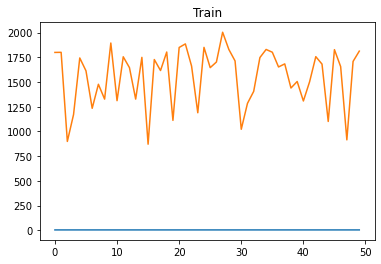

2/2 [==============================] - 1s 9ms/step


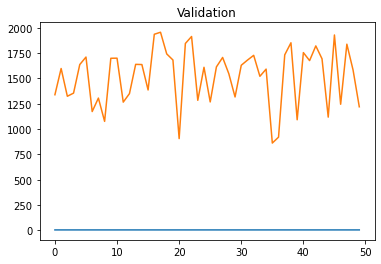

3/3 [==============================] - 0s 4ms/step


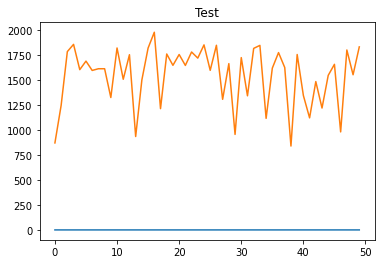

3/3 [==============================] - 0s 5ms/step


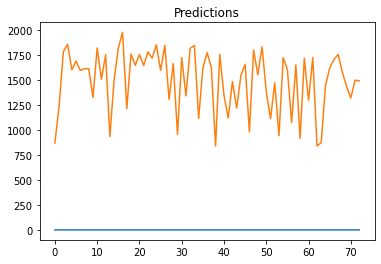

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
1/8 [==>...........................] - ETA: 16s - loss: 2218508.5000 - root_mean_squared_error: 1489.4658INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 681ms/step - loss: 2429265.5000 - root_mean_squared_error: 1558.6101 - val_loss: 2415164.7500 - val_root_mean_squared_error: 1554.0801
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2477131.0000 - root_mean_squared_error: 1573.8904INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 2429102.0000 - root_mean_squared_error: 1558.5576 - val_loss: 2415005.0000 - val_root_mean_squared_error: 1554.0287
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2367870.5000 - root_mean_squared_error: 1538.7887INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 529ms/step - loss: 2428943.0000 - root_mean_squared_error: 1558.5067 - val_loss: 2414845.0000 - val_root_mean_squared_error: 1553.9772
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2424054.7500 - root_mean_squared_error: 1556.9376INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 839ms/step - loss: 2428784.7500 - root_mean_squared_error: 1558.4559 - val_loss: 2414685.7500 - val_root_mean_squared_error: 1553.9259
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2428626.2500 - root_mean_squared_error: 1558.4050INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 737ms/step - loss: 2428626.2500 - root_mean_squared_error: 1558.4050 - val_loss: 2414526.2500 - val_root_mean_squared_error: 1553.8746
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2606104.0000 - root_mean_squared_error: 1614.3433INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 721ms/step - loss: 2428466.5000 - root_mean_squared_error: 1558.3538 - val_loss: 2414367.0000 - val_root_mean_squared_error: 1553.8234
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2470951.2500 - root_mean_squared_error: 1571.9260INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 697ms/step - loss: 2428307.2500 - root_mean_squared_error: 1558.3027 - val_loss: 2414207.5000 - val_root_mean_squared_error: 1553.7720
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2412485.2500 - root_mean_squared_error: 1553.2177INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 757ms/step - loss: 2428148.0000 - root_mean_squared_error: 1558.2516 - val_loss: 2414048.7500 - val_root_mean_squared_error: 1553.7209
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2422471.2500 - root_mean_squared_error: 1556.4290INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 756ms/step - loss: 2427990.0000 - root_mean_squared_error: 1558.2009 - val_loss: 2413890.5000 - val_root_mean_squared_error: 1553.6700
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 2491358.0000 - root_mean_squared_error: 1578.4036INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 686ms/step - loss: 2427832.0000 - root_mean_squared_error: 1558.1501 - val_loss: 2413731.2500 - val_root_mean_squared_error: 1553.6188
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2334703.2500 - root_mean_squared_error: 1527.9736INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 723ms/step - loss: 2427672.0000 - root_mean_squared_error: 1558.0989 - val_loss: 2413572.5000 - val_root_mean_squared_error: 1553.5676
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 2525448.0000 - root_mean_squared_error: 1589.1658INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 838ms/step - loss: 2427515.0000 - root_mean_squared_error: 1558.0485 - val_loss: 2413413.2500 - val_root_mean_squared_error: 1553.5164
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2427355.7500 - root_mean_squared_error: 1557.9973INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 819ms/step - loss: 2427355.7500 - root_mean_squared_error: 1557.9973 - val_loss: 2413253.5000 - val_root_mean_squared_error: 1553.4650
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2251962.0000 - root_mean_squared_error: 1500.6538INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 650ms/step - loss: 2427196.7500 - root_mean_squared_error: 1557.9463 - val_loss: 2413095.2500 - val_root_mean_squared_error: 1553.4141
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2427037.2500 - root_mean_squared_error: 1557.8951INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 714ms/step - loss: 2427037.2500 - root_mean_squared_error: 1557.8951 - val_loss: 2412935.7500 - val_root_mean_squared_error: 1553.3628
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2426879.5000 - root_mean_squared_error: 1557.8445INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 710ms/step - loss: 2426879.5000 - root_mean_squared_error: 1557.8445 - val_loss: 2412776.2500 - val_root_mean_squared_error: 1553.3114
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2426720.2500 - root_mean_squared_error: 1557.7933INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 865ms/step - loss: 2426720.2500 - root_mean_squared_error: 1557.7933 - val_loss: 2412616.2500 - val_root_mean_squared_error: 1553.2599
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2451944.5000 - root_mean_squared_error: 1565.8687INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 806ms/step - loss: 2426560.7500 - root_mean_squared_error: 1557.7422 - val_loss: 2412458.0000 - val_root_mean_squared_error: 1553.2090
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2416546.5000 - root_mean_squared_error: 1554.5245INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 620ms/step - loss: 2426402.0000 - root_mean_squared_error: 1557.6913 - val_loss: 2412299.0000 - val_root_mean_squared_error: 1553.1577
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2373441.0000 - root_mean_squared_error: 1540.5977INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 523ms/step - loss: 2426243.7500 - root_mean_squared_error: 1557.6405 - val_loss: 2412139.0000 - val_root_mean_squared_error: 1553.1062
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2428144.5000 - root_mean_squared_error: 1558.2505INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 770ms/step - loss: 2426084.2500 - root_mean_squared_error: 1557.5892 - val_loss: 2411980.5000 - val_root_mean_squared_error: 1553.0552
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2301311.5000 - root_mean_squared_error: 1517.0074INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 679ms/step - loss: 2425926.2500 - root_mean_squared_error: 1557.5386 - val_loss: 2411821.7500 - val_root_mean_squared_error: 1553.0042
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2425647.7500 - root_mean_squared_error: 1557.4491INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 594ms/step - loss: 2425768.5000 - root_mean_squared_error: 1557.4879 - val_loss: 2411664.0000 - val_root_mean_squared_error: 1552.9534
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2405000.5000 - root_mean_squared_error: 1550.8064INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 634ms/step - loss: 2425611.2500 - root_mean_squared_error: 1557.4374 - val_loss: 2411506.7500 - val_root_mean_squared_error: 1552.9027
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2425454.0000 - root_mean_squared_error: 1557.3870INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 758ms/step - loss: 2425454.0000 - root_mean_squared_error: 1557.3870 - val_loss: 2411349.5000 - val_root_mean_squared_error: 1552.8521
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2313308.5000 - root_mean_squared_error: 1520.9564INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 2425296.7500 - root_mean_squared_error: 1557.3364 - val_loss: 2411191.5000 - val_root_mean_squared_error: 1552.8011
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2425140.0000 - root_mean_squared_error: 1557.2861INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 2425140.0000 - root_mean_squared_error: 1557.2861 - val_loss: 2411031.7500 - val_root_mean_squared_error: 1552.7499
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2231659.2500 - root_mean_squared_error: 1493.8739INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 537ms/step - loss: 2424978.7500 - root_mean_squared_error: 1557.2344 - val_loss: 2410873.5000 - val_root_mean_squared_error: 1552.6987
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2273120.5000 - root_mean_squared_error: 1507.6871INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 481ms/step - loss: 2424820.7500 - root_mean_squared_error: 1557.1836 - val_loss: 2410712.7500 - val_root_mean_squared_error: 1552.6470
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2473070.2500 - root_mean_squared_error: 1572.5999INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 671ms/step - loss: 2424661.5000 - root_mean_squared_error: 1557.1324 - val_loss: 2410553.5000 - val_root_mean_squared_error: 1552.5957
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2697101.5000 - root_mean_squared_error: 1642.2854INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 587ms/step - loss: 2424502.2500 - root_mean_squared_error: 1557.0813 - val_loss: 2410394.5000 - val_root_mean_squared_error: 1552.5446
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2398419.0000 - root_mean_squared_error: 1548.6830INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 680ms/step - loss: 2424343.5000 - root_mean_squared_error: 1557.0304 - val_loss: 2410235.0000 - val_root_mean_squared_error: 1552.4932
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2407847.0000 - root_mean_squared_error: 1551.7239INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 696ms/step - loss: 2424184.2500 - root_mean_squared_error: 1556.9792 - val_loss: 2410075.0000 - val_root_mean_squared_error: 1552.4417
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2104690.0000 - root_mean_squared_error: 1450.7550INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 843ms/step - loss: 2424024.5000 - root_mean_squared_error: 1556.9279 - val_loss: 2409917.0000 - val_root_mean_squared_error: 1552.3907
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2423867.0000 - root_mean_squared_error: 1556.8773INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 802ms/step - loss: 2423867.0000 - root_mean_squared_error: 1556.8773 - val_loss: 2409757.7500 - val_root_mean_squared_error: 1552.3395
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2292288.0000 - root_mean_squared_error: 1514.0304INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 636ms/step - loss: 2423708.5000 - root_mean_squared_error: 1556.8264 - val_loss: 2409598.2500 - val_root_mean_squared_error: 1552.2881
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2567274.0000 - root_mean_squared_error: 1602.2715INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 638ms/step - loss: 2423550.0000 - root_mean_squared_error: 1556.7755 - val_loss: 2409438.5000 - val_root_mean_squared_error: 1552.2366
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2622776.0000 - root_mean_squared_error: 1619.4987INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 905ms/step - loss: 2423391.0000 - root_mean_squared_error: 1556.7245 - val_loss: 2409281.7500 - val_root_mean_squared_error: 1552.1862
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2301149.0000 - root_mean_squared_error: 1516.9539INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 555ms/step - loss: 2423233.5000 - root_mean_squared_error: 1556.6738 - val_loss: 2409124.7500 - val_root_mean_squared_error: 1552.1355
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2254444.0000 - root_mean_squared_error: 1501.4806INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 519ms/step - loss: 2423077.0000 - root_mean_squared_error: 1556.6235 - val_loss: 2408967.0000 - val_root_mean_squared_error: 1552.0848
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2344895.0000 - root_mean_squared_error: 1531.3051INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 549ms/step - loss: 2422919.5000 - root_mean_squared_error: 1556.5730 - val_loss: 2408808.7500 - val_root_mean_squared_error: 1552.0337
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2487093.0000 - root_mean_squared_error: 1577.0520INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 706ms/step - loss: 2422762.7500 - root_mean_squared_error: 1556.5227 - val_loss: 2408651.0000 - val_root_mean_squared_error: 1551.9828
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2230229.0000 - root_mean_squared_error: 1493.3951INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 560ms/step - loss: 2422604.0000 - root_mean_squared_error: 1556.4717 - val_loss: 2408493.0000 - val_root_mean_squared_error: 1551.9319
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2157595.0000 - root_mean_squared_error: 1468.8754INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 705ms/step - loss: 2422446.7500 - root_mean_squared_error: 1556.4211 - val_loss: 2408334.2500 - val_root_mean_squared_error: 1551.8809
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2422287.2500 - root_mean_squared_error: 1556.3699INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 542ms/step - loss: 2422287.2500 - root_mean_squared_error: 1556.3699 - val_loss: 2408175.5000 - val_root_mean_squared_error: 1551.8297
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 2701312.7500 - root_mean_squared_error: 1643.5671INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 475ms/step - loss: 2422130.0000 - root_mean_squared_error: 1556.3193 - val_loss: 2408015.5000 - val_root_mean_squared_error: 1551.7782
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2548640.5000 - root_mean_squared_error: 1596.4462INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 686ms/step - loss: 2421970.2500 - root_mean_squared_error: 1556.2681 - val_loss: 2407856.5000 - val_root_mean_squared_error: 1551.7268
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2554569.2500 - root_mean_squared_error: 1598.3020INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 490ms/step - loss: 2421811.7500 - root_mean_squared_error: 1556.2172 - val_loss: 2407697.7500 - val_root_mean_squared_error: 1551.6758
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2684866.5000 - root_mean_squared_error: 1638.5563INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 517ms/step - loss: 2421653.5000 - root_mean_squared_error: 1556.1663 - val_loss: 2407539.2500 - val_root_mean_squared_error: 1551.6248
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2421495.2500 - root_mean_squared_error: 1556.1155INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 0s 4ms/step


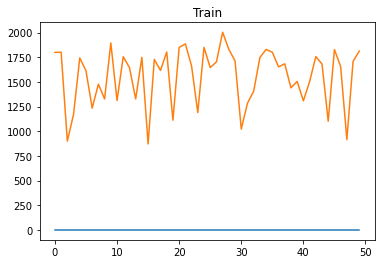

2/2 [==============================] - 1s 11ms/step


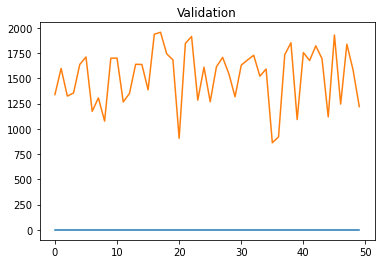

3/3 [==============================] - 0s 3ms/step


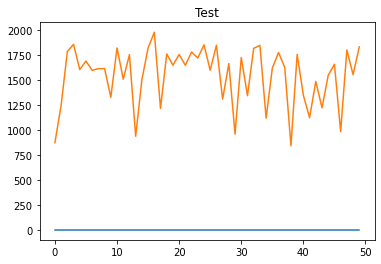

3/3 [==============================] - 0s 4ms/step


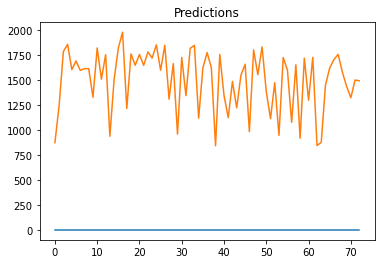

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
4/8 [==============>...............] - ETA: 0s - loss: 2488817.7500 - root_mean_squared_error: 1577.5988 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 435ms/step - loss: 2439001.2500 - root_mean_squared_error: 1561.7302 - val_loss: 2357234.7500 - val_root_mean_squared_error: 1535.3289
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2403102.5000 - root_mean_squared_error: 1550.1943

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 456ms/step - loss: 2392677.5000 - root_mean_squared_error: 1546.8282 - val_loss: 2324449.0000 - val_root_mean_squared_error: 1524.6144
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2287209.7500 - root_mean_squared_error: 1512.3524

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 488ms/step - loss: 2302333.7500 - root_mean_squared_error: 1517.3444 - val_loss: 2307183.0000 - val_root_mean_squared_error: 1518.9414
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2239657.5000 - root_mean_squared_error: 1496.5486

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 524ms/step - loss: 2239657.5000 - root_mean_squared_error: 1496.5486 - val_loss: 2261953.0000 - val_root_mean_squared_error: 1503.9790
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2168972.0000 - root_mean_squared_error: 1472.7430

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 464ms/step - loss: 2180934.0000 - root_mean_squared_error: 1476.7986 - val_loss: 2178852.5000 - val_root_mean_squared_error: 1476.0936
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2144409.2500 - root_mean_squared_error: 1464.3801

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 515ms/step - loss: 2102857.7500 - root_mean_squared_error: 1450.1234 - val_loss: 2038170.2500 - val_root_mean_squared_error: 1427.6450
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 1928876.6250 - root_mean_squared_error: 1388.8401

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 377ms/step - loss: 1931870.2500 - root_mean_squared_error: 1389.9174 - val_loss: 1884277.0000 - val_root_mean_squared_error: 1372.6897
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 1851556.2500 - root_mean_squared_error: 1360.7190

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 431ms/step - loss: 1851556.2500 - root_mean_squared_error: 1360.7190 - val_loss: 1724212.3750 - val_root_mean_squared_error: 1313.0927
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 1680167.2500 - root_mean_squared_error: 1296.2126

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 578ms/step - loss: 1677633.0000 - root_mean_squared_error: 1295.2347 - val_loss: 1562687.1250 - val_root_mean_squared_error: 1250.0748
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 1566273.0000 - root_mean_squared_error: 1251.5083

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 473ms/step - loss: 1548606.5000 - root_mean_squared_error: 1244.4302 - val_loss: 1404518.8750 - val_root_mean_squared_error: 1185.1240
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 1381708.6250 - root_mean_squared_error: 1175.4611

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 456ms/step - loss: 1379939.0000 - root_mean_squared_error: 1174.7080 - val_loss: 1253605.8750 - val_root_mean_squared_error: 1119.6454
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 1212319.7500 - root_mean_squared_error: 1101.0540

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 543ms/step - loss: 1212319.7500 - root_mean_squared_error: 1101.0540 - val_loss: 1111376.1250 - val_root_mean_squared_error: 1054.2183
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 1112758.2500 - root_mean_squared_error: 1054.8735

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 475ms/step - loss: 1103835.8750 - root_mean_squared_error: 1050.6360 - val_loss: 978634.0625 - val_root_mean_squared_error: 989.2593
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 1044867.0000 - root_mean_squared_error: 1022.1874

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 473ms/step - loss: 977764.6250 - root_mean_squared_error: 988.8198 - val_loss: 852196.2500 - val_root_mean_squared_error: 923.1448
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 834130.0000 - root_mean_squared_error: 913.3072

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 555ms/step - loss: 834130.0000 - root_mean_squared_error: 913.3072 - val_loss: 734585.4375 - val_root_mean_squared_error: 857.0796
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 702948.3750 - root_mean_squared_error: 838.4202

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 351ms/step - loss: 706412.8750 - root_mean_squared_error: 840.4837 - val_loss: 624594.1875 - val_root_mean_squared_error: 790.3127
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 619389.4375 - root_mean_squared_error: 787.0130

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 364ms/step - loss: 612725.5000 - root_mean_squared_error: 782.7678 - val_loss: 524680.0000 - val_root_mean_squared_error: 724.3480
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 499013.1562 - root_mean_squared_error: 706.4086

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 499013.1562 - root_mean_squared_error: 706.4086 - val_loss: 432944.7500 - val_root_mean_squared_error: 657.9854
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 472353.1875 - root_mean_squared_error: 687.2795

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 492ms/step - loss: 441142.1562 - root_mean_squared_error: 664.1853 - val_loss: 349874.0625 - val_root_mean_squared_error: 591.5015
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 360031.1562 - root_mean_squared_error: 600.0259

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 502ms/step - loss: 336042.3438 - root_mean_squared_error: 579.6916 - val_loss: 278464.9062 - val_root_mean_squared_error: 527.6978
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 288871.2500 - root_mean_squared_error: 537.4675

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 481ms/step - loss: 288871.2500 - root_mean_squared_error: 537.4675 - val_loss: 218712.7656 - val_root_mean_squared_error: 467.6674
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 255255.8750 - root_mean_squared_error: 505.2285

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 327ms/step - loss: 238256.1875 - root_mean_squared_error: 488.1149 - val_loss: 167585.6250 - val_root_mean_squared_error: 409.3722
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 179854.7812 - root_mean_squared_error: 424.0929

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 472ms/step - loss: 179854.7812 - root_mean_squared_error: 424.0929 - val_loss: 125198.2188 - val_root_mean_squared_error: 353.8336
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 141436.4219 - root_mean_squared_error: 376.0804

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 457ms/step - loss: 142133.5781 - root_mean_squared_error: 377.0061 - val_loss: 91068.5234 - val_root_mean_squared_error: 301.7756
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 125384.6016 - root_mean_squared_error: 354.0969

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 536ms/step - loss: 124977.3438 - root_mean_squared_error: 353.5214 - val_loss: 64552.4922 - val_root_mean_squared_error: 254.0718
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 90006.0625 - root_mean_squared_error: 300.0101

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 504ms/step - loss: 88211.6328 - root_mean_squared_error: 297.0044 - val_loss: 44502.4766 - val_root_mean_squared_error: 210.9561
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 64800.4336 - root_mean_squared_error: 254.5593

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 470ms/step - loss: 64800.4336 - root_mean_squared_error: 254.5593 - val_loss: 29958.3398 - val_root_mean_squared_error: 173.0848
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 64461.7070 - root_mean_squared_error: 253.8931

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 496ms/step - loss: 64060.6680 - root_mean_squared_error: 253.1021 - val_loss: 19873.4219 - val_root_mean_squared_error: 140.9731
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 51013.2461 - root_mean_squared_error: 225.8611

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 477ms/step - loss: 51013.2461 - root_mean_squared_error: 225.8611 - val_loss: 13121.8574 - val_root_mean_squared_error: 114.5507
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 45876.9297 - root_mean_squared_error: 214.1890

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 496ms/step - loss: 43456.4141 - root_mean_squared_error: 208.4620 - val_loss: 8662.1348 - val_root_mean_squared_error: 93.0706
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 37124.1523 - root_mean_squared_error: 192.6763

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 503ms/step - loss: 37124.1523 - root_mean_squared_error: 192.6763 - val_loss: 5694.8643 - val_root_mean_squared_error: 75.4643
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 53073.2891 - root_mean_squared_error: 230.3764

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 422ms/step - loss: 41292.3867 - root_mean_squared_error: 203.2053 - val_loss: 4058.3350 - val_root_mean_squared_error: 63.7051
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 40264.0039 - root_mean_squared_error: 200.6589

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 386ms/step - loss: 41777.3516 - root_mean_squared_error: 204.3951 - val_loss: 3133.7378 - val_root_mean_squared_error: 55.9798
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 32153.5273 - root_mean_squared_error: 179.3140

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 337ms/step - loss: 32153.5273 - root_mean_squared_error: 179.3140 - val_loss: 2572.4709 - val_root_mean_squared_error: 50.7195
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 30374.9590 - root_mean_squared_error: 174.2841

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 420ms/step - loss: 34100.6016 - root_mean_squared_error: 184.6635 - val_loss: 2270.8186 - val_root_mean_squared_error: 47.6531
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 28814.8320 - root_mean_squared_error: 169.7493

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 429ms/step - loss: 39033.0781 - root_mean_squared_error: 197.5679 - val_loss: 2066.2515 - val_root_mean_squared_error: 45.4560
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 38239.4492 - root_mean_squared_error: 195.5491

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 376ms/step - loss: 38239.4492 - root_mean_squared_error: 195.5491 - val_loss: 1943.9598 - val_root_mean_squared_error: 44.0904
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 48457.1875 - root_mean_squared_error: 220.1299

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 512ms/step - loss: 44854.3984 - root_mean_squared_error: 211.7886 - val_loss: 1911.7866 - val_root_mean_squared_error: 43.7240
Epoch 39/50
8/8 [==============================] - 0s 28ms/step - loss: 43573.8672 - root_mean_squared_error: 208.7435 - val_loss: 1927.5010 - val_root_mean_squared_error: 43.9033
Epoch 40/50
8/8 [==============================] - 0s 22ms/step - loss: 38067.5938 - root_mean_squared_error: 195.1092 - val_loss: 1944.0326 - val_root_mean_squared_error: 44.0912
Epoch 41/50
8/8 [==============================] - 0s 30ms/step - loss: 39166.9023 - root_mean_squared_error: 197.9063 - val_loss: 1954.8925 - val_root_mean_squared_error: 44.2142
Epoch 42/50
8/8 [==============================] - 0s 27ms/step - loss: 37748.5859 - root_mean_squared_error: 194.2899 - val_loss: 1927.5991 - val_root_mean_squared_error: 43.9044
Epoch 43/50
8/8 [==============================] - 0s 25ms/step - loss: 40980.1992 - root_mean_squared_error: 2

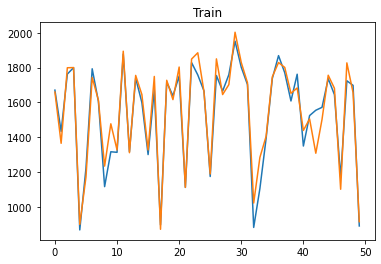

2/2 [==============================] - 0s 6ms/step


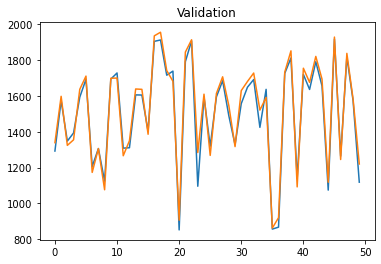

3/3 [==============================] - 0s 11ms/step


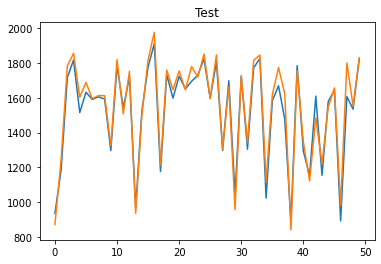

3/3 [==============================] - 0s 6ms/step


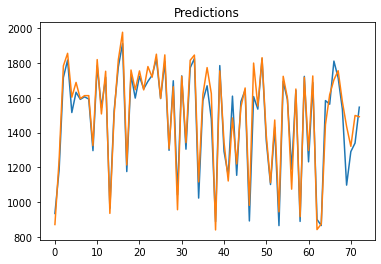

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

5371.275139743386

### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2417980.5000 - root_mean_squared_error: 1554.9857 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 2s/step - loss: 2419917.7500 - root_mean_squared_error: 1555.6085 - val_loss: 2406613.5000 - val_root_mean_squared_error: 1551.3264
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2386810.0000 - root_mean_squared_error: 1544.9304

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2419645.2500 - root_mean_squared_error: 1555.5209 - val_loss: 2406481.7500 - val_root_mean_squared_error: 1551.2839
Epoch 3/50
4/8 [==============>...............] - ETA: 0s - loss: 2398377.2500 - root_mean_squared_error: 1548.6696

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2419392.7500 - root_mean_squared_error: 1555.4397 - val_loss: 2406378.7500 - val_root_mean_squared_error: 1551.2507
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2416459.5000 - root_mean_squared_error: 1554.4966

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2419394.5000 - root_mean_squared_error: 1555.4403 - val_loss: 2406280.5000 - val_root_mean_squared_error: 1551.2190
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2421225.7500 - root_mean_squared_error: 1556.0288

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2419160.5000 - root_mean_squared_error: 1555.3651 - val_loss: 2406163.0000 - val_root_mean_squared_error: 1551.1812
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2519257.5000 - root_mean_squared_error: 1587.2169

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2419153.0000 - root_mean_squared_error: 1555.3627 - val_loss: 2405853.7500 - val_root_mean_squared_error: 1551.0814
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2402617.0000 - root_mean_squared_error: 1550.0377

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2418753.0000 - root_mean_squared_error: 1555.2340 - val_loss: 2405494.0000 - val_root_mean_squared_error: 1550.9655
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2418396.7500 - root_mean_squared_error: 1555.1195

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2418396.7500 - root_mean_squared_error: 1555.1195 - val_loss: 2405109.0000 - val_root_mean_squared_error: 1550.8414
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2425758.7500 - root_mean_squared_error: 1557.4847

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2418244.0000 - root_mean_squared_error: 1555.0704 - val_loss: 2404976.0000 - val_root_mean_squared_error: 1550.7985
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2417902.0000 - root_mean_squared_error: 1554.9604

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2417902.0000 - root_mean_squared_error: 1554.9604 - val_loss: 2404880.2500 - val_root_mean_squared_error: 1550.7676
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2430969.7500 - root_mean_squared_error: 1559.1567

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2417965.0000 - root_mean_squared_error: 1554.9807 - val_loss: 2404785.0000 - val_root_mean_squared_error: 1550.7369
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 2456982.7500 - root_mean_squared_error: 1567.4766

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2417739.2500 - root_mean_squared_error: 1554.9081 - val_loss: 2404690.2500 - val_root_mean_squared_error: 1550.7064
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 2441676.5000 - root_mean_squared_error: 1562.5864

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2417665.7500 - root_mean_squared_error: 1554.8845 - val_loss: 2404589.2500 - val_root_mean_squared_error: 1550.6738
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2441911.2500 - root_mean_squared_error: 1562.6616

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2417527.2500 - root_mean_squared_error: 1554.8400 - val_loss: 2404434.5000 - val_root_mean_squared_error: 1550.6239
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2405387.5000 - root_mean_squared_error: 1550.9312

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2417443.0000 - root_mean_squared_error: 1554.8129 - val_loss: 2404190.0000 - val_root_mean_squared_error: 1550.5452
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2412442.2500 - root_mean_squared_error: 1553.2039

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2417128.7500 - root_mean_squared_error: 1554.7118 - val_loss: 2403995.5000 - val_root_mean_squared_error: 1550.4823
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2417008.7500 - root_mean_squared_error: 1554.6732

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2417008.7500 - root_mean_squared_error: 1554.6732 - val_loss: 2403445.5000 - val_root_mean_squared_error: 1550.3049
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2450428.5000 - root_mean_squared_error: 1565.3844

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2416319.7500 - root_mean_squared_error: 1554.4515 - val_loss: 2403274.0000 - val_root_mean_squared_error: 1550.2496
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2386562.0000 - root_mean_squared_error: 1544.8501

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2416353.7500 - root_mean_squared_error: 1554.4625 - val_loss: 2403170.0000 - val_root_mean_squared_error: 1550.2161
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2416074.5000 - root_mean_squared_error: 1554.3727

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2416074.5000 - root_mean_squared_error: 1554.3727 - val_loss: 2403066.5000 - val_root_mean_squared_error: 1550.1827
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2504452.7500 - root_mean_squared_error: 1582.5463

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2416231.5000 - root_mean_squared_error: 1554.4232 - val_loss: 2402963.2500 - val_root_mean_squared_error: 1550.1494
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2578439.2500 - root_mean_squared_error: 1605.7520

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2416012.0000 - root_mean_squared_error: 1554.3525 - val_loss: 2402861.0000 - val_root_mean_squared_error: 1550.1165
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2398606.2500 - root_mean_squared_error: 1548.7434

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2415817.2500 - root_mean_squared_error: 1554.2899 - val_loss: 2402759.0000 - val_root_mean_squared_error: 1550.0835
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2415957.0000 - root_mean_squared_error: 1554.3350

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2415957.0000 - root_mean_squared_error: 1554.3350 - val_loss: 2402658.2500 - val_root_mean_squared_error: 1550.0510
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2451094.0000 - root_mean_squared_error: 1565.5970

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2415640.0000 - root_mean_squared_error: 1554.2329 - val_loss: 2402557.5000 - val_root_mean_squared_error: 1550.0186
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2312964.5000 - root_mean_squared_error: 1520.8434

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2415643.5000 - root_mean_squared_error: 1554.2340 - val_loss: 2402457.5000 - val_root_mean_squared_error: 1549.9863
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2442785.0000 - root_mean_squared_error: 1562.9412

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2415538.7500 - root_mean_squared_error: 1554.2003 - val_loss: 2402357.0000 - val_root_mean_squared_error: 1549.9539
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2401680.0000 - root_mean_squared_error: 1549.7355

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2415696.0000 - root_mean_squared_error: 1554.2510 - val_loss: 2402256.0000 - val_root_mean_squared_error: 1549.9213
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 2355437.5000 - root_mean_squared_error: 1534.7434

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2415048.0000 - root_mean_squared_error: 1554.0425 - val_loss: 2401961.5000 - val_root_mean_squared_error: 1549.8263
Epoch 30/50
4/8 [==============>...............] - ETA: 0s - loss: 2482501.5000 - root_mean_squared_error: 1575.5956

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2414673.7500 - root_mean_squared_error: 1553.9220 - val_loss: 2401486.5000 - val_root_mean_squared_error: 1549.6730
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2477288.0000 - root_mean_squared_error: 1573.9403

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2414519.7500 - root_mean_squared_error: 1553.8726 - val_loss: 2401366.5000 - val_root_mean_squared_error: 1549.6343
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2402416.2500 - root_mean_squared_error: 1549.9730

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2414336.7500 - root_mean_squared_error: 1553.8136 - val_loss: 2401267.2500 - val_root_mean_squared_error: 1549.6023
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2414075.0000 - root_mean_squared_error: 1553.7294

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2414075.0000 - root_mean_squared_error: 1553.7294 - val_loss: 2401169.7500 - val_root_mean_squared_error: 1549.5708
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2328545.5000 - root_mean_squared_error: 1525.9573

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2414269.2500 - root_mean_squared_error: 1553.7919 - val_loss: 2401072.5000 - val_root_mean_squared_error: 1549.5394
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2411586.7500 - root_mean_squared_error: 1552.9285

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2414161.5000 - root_mean_squared_error: 1553.7572 - val_loss: 2400976.5000 - val_root_mean_squared_error: 1549.5084
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 2459503.5000 - root_mean_squared_error: 1568.2804

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2413958.2500 - root_mean_squared_error: 1553.6918 - val_loss: 2400879.5000 - val_root_mean_squared_error: 1549.4772
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2413893.0000 - root_mean_squared_error: 1553.6708

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2413893.0000 - root_mean_squared_error: 1553.6708 - val_loss: 2400783.7500 - val_root_mean_squared_error: 1549.4463
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2488104.0000 - root_mean_squared_error: 1577.3726

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2413826.0000 - root_mean_squared_error: 1553.6493 - val_loss: 2400688.0000 - val_root_mean_squared_error: 1549.4154
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2434781.0000 - root_mean_squared_error: 1560.3785

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2413844.2500 - root_mean_squared_error: 1553.6552 - val_loss: 2400591.5000 - val_root_mean_squared_error: 1549.3843
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2413673.2500 - root_mean_squared_error: 1553.6001

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2413673.2500 - root_mean_squared_error: 1553.6001 - val_loss: 2400494.5000 - val_root_mean_squared_error: 1549.3529
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2288745.5000 - root_mean_squared_error: 1512.8600

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2413417.7500 - root_mean_squared_error: 1553.5178 - val_loss: 2400398.5000 - val_root_mean_squared_error: 1549.3219
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2413485.2500 - root_mean_squared_error: 1553.5396

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2413485.2500 - root_mean_squared_error: 1553.5396 - val_loss: 2400302.2500 - val_root_mean_squared_error: 1549.2909
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2418182.0000 - root_mean_squared_error: 1555.0505

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2413292.2500 - root_mean_squared_error: 1553.4774 - val_loss: 2400207.0000 - val_root_mean_squared_error: 1549.2601
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2415048.2500 - root_mean_squared_error: 1554.0426

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2413198.2500 - root_mean_squared_error: 1553.4473 - val_loss: 2400110.5000 - val_root_mean_squared_error: 1549.2290
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2439160.7500 - root_mean_squared_error: 1561.7812

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2413162.5000 - root_mean_squared_error: 1553.4357 - val_loss: 2400015.0000 - val_root_mean_squared_error: 1549.1981
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2409121.7500 - root_mean_squared_error: 1552.1345

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2413086.0000 - root_mean_squared_error: 1553.4111 - val_loss: 2399919.7500 - val_root_mean_squared_error: 1549.1675
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2375249.7500 - root_mean_squared_error: 1541.1846

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2412963.2500 - root_mean_squared_error: 1553.3716 - val_loss: 2399824.0000 - val_root_mean_squared_error: 1549.1365
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2517429.7500 - root_mean_squared_error: 1586.6410

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2412792.0000 - root_mean_squared_error: 1553.3164 - val_loss: 2399728.0000 - val_root_mean_squared_error: 1549.1056
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2405963.2500 - root_mean_squared_error: 1551.1168

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2412716.5000 - root_mean_squared_error: 1553.2921 - val_loss: 2399632.0000 - val_root_mean_squared_error: 1549.0746
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2565119.0000 - root_mean_squared_error: 1601.5989

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 1s 7ms/step


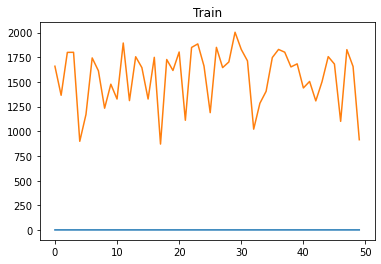

2/2 [==============================] - 1s 10ms/step


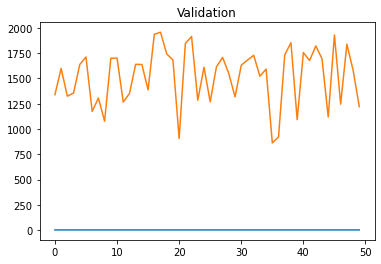

3/3 [==============================] - 0s 6ms/step


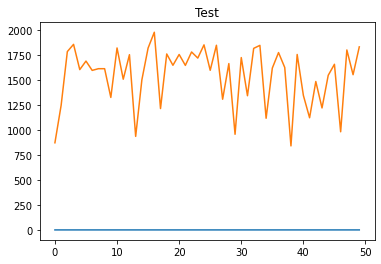

3/3 [==============================] - 0s 4ms/step


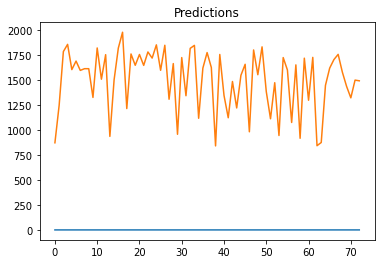

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

2329827.5851329984

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2395242.5000 - root_mean_squared_error: 1547.6571  

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 2s/step - loss: 2417674.2500 - root_mean_squared_error: 1554.8872 - val_loss: 2404408.7500 - val_root_mean_squared_error: 1550.6156
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2417391.7500 - root_mean_squared_error: 1554.7964

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2417391.7500 - root_mean_squared_error: 1554.7964 - val_loss: 2404278.5000 - val_root_mean_squared_error: 1550.5736
Epoch 3/50
4/8 [==============>...............] - ETA: 0s - loss: 2492453.7500 - root_mean_squared_error: 1578.7507

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2417285.7500 - root_mean_squared_error: 1554.7623 - val_loss: 2404197.5000 - val_root_mean_squared_error: 1550.5475
Epoch 4/50
3/8 [==========>...................] - ETA: 0s - loss: 2347677.5000 - root_mean_squared_error: 1532.2133

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2417172.2500 - root_mean_squared_error: 1554.7258 - val_loss: 2404135.2500 - val_root_mean_squared_error: 1550.5273
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2415760.0000 - root_mean_squared_error: 1554.2715

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2417136.5000 - root_mean_squared_error: 1554.7142 - val_loss: 2404077.5000 - val_root_mean_squared_error: 1550.5088
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 2490234.7500 - root_mean_squared_error: 1578.0477

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2417016.2500 - root_mean_squared_error: 1554.6757 - val_loss: 2404021.5000 - val_root_mean_squared_error: 1550.4907
Epoch 7/50
4/8 [==============>...............] - ETA: 0s - loss: 2412687.0000 - root_mean_squared_error: 1553.2826

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2417022.5000 - root_mean_squared_error: 1554.6776 - val_loss: 2403967.0000 - val_root_mean_squared_error: 1550.4731
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2427144.2500 - root_mean_squared_error: 1557.9294

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2416856.7500 - root_mean_squared_error: 1554.6243 - val_loss: 2403911.5000 - val_root_mean_squared_error: 1550.4552
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2416892.0000 - root_mean_squared_error: 1554.6356

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2416892.0000 - root_mean_squared_error: 1554.6356 - val_loss: 2403853.7500 - val_root_mean_squared_error: 1550.4366
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2463178.7500 - root_mean_squared_error: 1569.4518

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2416862.2500 - root_mean_squared_error: 1554.6261 - val_loss: 2403777.5000 - val_root_mean_squared_error: 1550.4120
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2420020.0000 - root_mean_squared_error: 1555.6414

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2416590.2500 - root_mean_squared_error: 1554.5386 - val_loss: 2403635.0000 - val_root_mean_squared_error: 1550.3661
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2424177.2500 - root_mean_squared_error: 1556.9769

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2416494.2500 - root_mean_squared_error: 1554.5077 - val_loss: 2403384.0000 - val_root_mean_squared_error: 1550.2852
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2396300.2500 - root_mean_squared_error: 1547.9988

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2416130.7500 - root_mean_squared_error: 1554.3907 - val_loss: 2403157.2500 - val_root_mean_squared_error: 1550.2120
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2309120.7500 - root_mean_squared_error: 1519.5791

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2416089.2500 - root_mean_squared_error: 1554.3774 - val_loss: 2403074.7500 - val_root_mean_squared_error: 1550.1854
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2416853.2500 - root_mean_squared_error: 1554.6232

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415847.2500 - root_mean_squared_error: 1554.2996 - val_loss: 2402986.0000 - val_root_mean_squared_error: 1550.1567
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2405149.7500 - root_mean_squared_error: 1550.8545

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2415935.2500 - root_mean_squared_error: 1554.3279 - val_loss: 2402873.7500 - val_root_mean_squared_error: 1550.1205
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2362652.0000 - root_mean_squared_error: 1537.0920

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2415789.5000 - root_mean_squared_error: 1554.2810 - val_loss: 2402802.5000 - val_root_mean_squared_error: 1550.0977
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2435945.7500 - root_mean_squared_error: 1560.7517

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2415589.7500 - root_mean_squared_error: 1554.2168 - val_loss: 2402639.0000 - val_root_mean_squared_error: 1550.0448
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 2391685.5000 - root_mean_squared_error: 1546.5076

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2415255.2500 - root_mean_squared_error: 1554.1091 - val_loss: 2402406.5000 - val_root_mean_squared_error: 1549.9698
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2340919.2500 - root_mean_squared_error: 1530.0063

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2415045.0000 - root_mean_squared_error: 1554.0415 - val_loss: 2402092.7500 - val_root_mean_squared_error: 1549.8687
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2415405.0000 - root_mean_squared_error: 1554.1573

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2414730.0000 - root_mean_squared_error: 1553.9402 - val_loss: 2401419.0000 - val_root_mean_squared_error: 1549.6514
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2207538.0000 - root_mean_squared_error: 1485.7786

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2414204.5000 - root_mean_squared_error: 1553.7711 - val_loss: 2401191.7500 - val_root_mean_squared_error: 1549.5779
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2402312.7500 - root_mean_squared_error: 1549.9396

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2414278.2500 - root_mean_squared_error: 1553.7948 - val_loss: 2401039.0000 - val_root_mean_squared_error: 1549.5287
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2539957.0000 - root_mean_squared_error: 1593.7242

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2414232.0000 - root_mean_squared_error: 1553.7799 - val_loss: 2400895.5000 - val_root_mean_squared_error: 1549.4823
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2387731.7500 - root_mean_squared_error: 1545.2288

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2413879.7500 - root_mean_squared_error: 1553.6665 - val_loss: 2400755.2500 - val_root_mean_squared_error: 1549.4371
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2087265.5000 - root_mean_squared_error: 1444.7372

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2413575.0000 - root_mean_squared_error: 1553.5685 - val_loss: 2400616.5000 - val_root_mean_squared_error: 1549.3923
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2413554.2500 - root_mean_squared_error: 1553.5618

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2413554.2500 - root_mean_squared_error: 1553.5618 - val_loss: 2400478.2500 - val_root_mean_squared_error: 1549.3477
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2240138.0000 - root_mean_squared_error: 1496.7091

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2413360.0000 - root_mean_squared_error: 1553.4993 - val_loss: 2400341.7500 - val_root_mean_squared_error: 1549.3036
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2413406.2500 - root_mean_squared_error: 1553.5142

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2413406.2500 - root_mean_squared_error: 1553.5142 - val_loss: 2400207.0000 - val_root_mean_squared_error: 1549.2601
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2399888.5000 - root_mean_squared_error: 1549.1573

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2413160.7500 - root_mean_squared_error: 1553.4352 - val_loss: 2400074.2500 - val_root_mean_squared_error: 1549.2173
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2411332.2500 - root_mean_squared_error: 1552.8466

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2413132.5000 - root_mean_squared_error: 1553.4260 - val_loss: 2399941.5000 - val_root_mean_squared_error: 1549.1744
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2412828.2500 - root_mean_squared_error: 1553.3281

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2412828.2500 - root_mean_squared_error: 1553.3281 - val_loss: 2399809.5000 - val_root_mean_squared_error: 1549.1320
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2488995.2500 - root_mean_squared_error: 1577.6550

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2412851.0000 - root_mean_squared_error: 1553.3354 - val_loss: 2399677.0000 - val_root_mean_squared_error: 1549.0891
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2408723.7500 - root_mean_squared_error: 1552.0063

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2412701.0000 - root_mean_squared_error: 1553.2871 - val_loss: 2399546.7500 - val_root_mean_squared_error: 1549.0470
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2379773.7500 - root_mean_squared_error: 1542.6515

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2412618.7500 - root_mean_squared_error: 1553.2607 - val_loss: 2399417.0000 - val_root_mean_squared_error: 1549.0051
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2353115.5000 - root_mean_squared_error: 1533.9868

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2412535.7500 - root_mean_squared_error: 1553.2340 - val_loss: 2399288.7500 - val_root_mean_squared_error: 1548.9639
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2412278.7500 - root_mean_squared_error: 1553.1512

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2412278.7500 - root_mean_squared_error: 1553.1512 - val_loss: 2399158.0000 - val_root_mean_squared_error: 1548.9215
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2405406.7500 - root_mean_squared_error: 1550.9374

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2412223.7500 - root_mean_squared_error: 1553.1335 - val_loss: 2398949.5000 - val_root_mean_squared_error: 1548.8542
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2411968.2500 - root_mean_squared_error: 1553.0513

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2411968.2500 - root_mean_squared_error: 1553.0513 - val_loss: 2398567.2500 - val_root_mean_squared_error: 1548.7308
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 2444231.0000 - root_mean_squared_error: 1563.4037

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2411525.2500 - root_mean_squared_error: 1552.9087 - val_loss: 2398386.5000 - val_root_mean_squared_error: 1548.6725
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 2387267.7500 - root_mean_squared_error: 1545.0786

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2411678.7500 - root_mean_squared_error: 1552.9580 - val_loss: 2398244.2500 - val_root_mean_squared_error: 1548.6265
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2407600.7500 - root_mean_squared_error: 1551.6445

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2411316.2500 - root_mean_squared_error: 1552.8413 - val_loss: 2398103.7500 - val_root_mean_squared_error: 1548.5812
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2423504.7500 - root_mean_squared_error: 1556.7610

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2411092.5000 - root_mean_squared_error: 1552.7693 - val_loss: 2397964.2500 - val_root_mean_squared_error: 1548.5361
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2411078.0000 - root_mean_squared_error: 1552.7646

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2411078.0000 - root_mean_squared_error: 1552.7646 - val_loss: 2397825.7500 - val_root_mean_squared_error: 1548.4915
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2428518.5000 - root_mean_squared_error: 1558.3705

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2410868.2500 - root_mean_squared_error: 1552.6971 - val_loss: 2397688.5000 - val_root_mean_squared_error: 1548.4471
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2404993.2500 - root_mean_squared_error: 1550.8041

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2410908.0000 - root_mean_squared_error: 1552.7098 - val_loss: 2397553.7500 - val_root_mean_squared_error: 1548.4036
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2448368.5000 - root_mean_squared_error: 1564.7263

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2410661.2500 - root_mean_squared_error: 1552.6304 - val_loss: 2397418.5000 - val_root_mean_squared_error: 1548.3600
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2403625.2500 - root_mean_squared_error: 1550.3629

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2410423.7500 - root_mean_squared_error: 1552.5540 - val_loss: 2397284.2500 - val_root_mean_squared_error: 1548.3165
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2428622.2500 - root_mean_squared_error: 1558.4038

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2410391.0000 - root_mean_squared_error: 1552.5435 - val_loss: 2397149.2500 - val_root_mean_squared_error: 1548.2729
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2491379.0000 - root_mean_squared_error: 1578.4103

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 2s 10ms/step


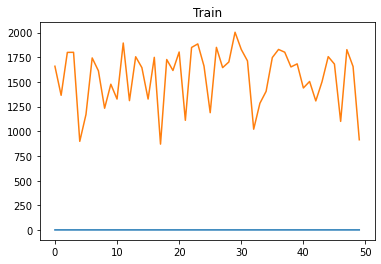

2/2 [==============================] - 1s 7ms/step


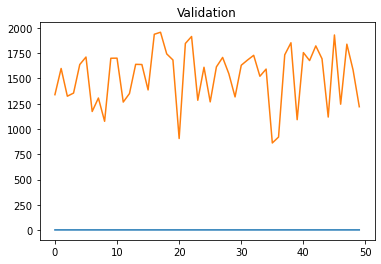

3/3 [==============================] - 0s 6ms/step


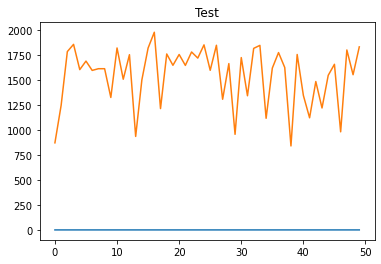

3/3 [==============================] - 0s 8ms/step


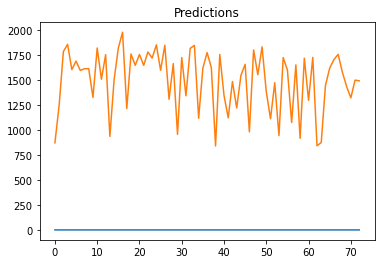

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

2327352.4190221033

### RNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2410905.7500 - root_mean_squared_error: 1552.7091INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 743ms/step - loss: 2409758.0000 - root_mean_squared_error: 1552.3395 - val_loss: 2396527.0000 - val_root_mean_squared_error: 1548.0720
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2404989.5000 - root_mean_squared_error: 1550.8029INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2409291.2500 - root_mean_squared_error: 1552.1892 - val_loss: 2396370.7500 - val_root_mean_squared_error: 1548.0216
Epoch 3/50
4/8 [==============>...............] - ETA: 0s - loss: 2409071.0000 - root_mean_squared_error: 1552.1183INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 871ms/step - loss: 2409477.0000 - root_mean_squared_error: 1552.2490 - val_loss: 2396214.2500 - val_root_mean_squared_error: 1547.9711
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2455500.0000 - root_mean_squared_error: 1567.0035INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2409048.0000 - root_mean_squared_error: 1552.1108 - val_loss: 2396056.7500 - val_root_mean_squared_error: 1547.9202
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2409170.2500 - root_mean_squared_error: 1552.1501INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 788ms/step - loss: 2409170.2500 - root_mean_squared_error: 1552.1501 - val_loss: 2395882.0000 - val_root_mean_squared_error: 1547.8636
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2398848.2500 - root_mean_squared_error: 1548.8215INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 895ms/step - loss: 2409196.5000 - root_mean_squared_error: 1552.1587 - val_loss: 2395445.7500 - val_root_mean_squared_error: 1547.7228
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 2420790.5000 - root_mean_squared_error: 1555.8889INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 704ms/step - loss: 2408310.7500 - root_mean_squared_error: 1551.8733 - val_loss: 2393628.7500 - val_root_mean_squared_error: 1547.1356
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2406340.7500 - root_mean_squared_error: 1551.2384INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 985ms/step - loss: 2406340.7500 - root_mean_squared_error: 1551.2384 - val_loss: 2393051.5000 - val_root_mean_squared_error: 1546.9491
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2412068.0000 - root_mean_squared_error: 1553.0834INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2406518.0000 - root_mean_squared_error: 1551.2955 - val_loss: 2392877.5000 - val_root_mean_squared_error: 1546.8929
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2399343.2500 - root_mean_squared_error: 1548.9813INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 730ms/step - loss: 2405984.2500 - root_mean_squared_error: 1551.1235 - val_loss: 2392720.7500 - val_root_mean_squared_error: 1546.8422
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2415678.2500 - root_mean_squared_error: 1554.2452INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 968ms/step - loss: 2406096.5000 - root_mean_squared_error: 1551.1597 - val_loss: 2392563.7500 - val_root_mean_squared_error: 1546.7914
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2405593.7500 - root_mean_squared_error: 1550.9977INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 900ms/step - loss: 2405593.7500 - root_mean_squared_error: 1550.9977 - val_loss: 2392407.5000 - val_root_mean_squared_error: 1546.7410
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2542770.5000 - root_mean_squared_error: 1594.6067INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 832ms/step - loss: 2405368.2500 - root_mean_squared_error: 1550.9249 - val_loss: 2392251.7500 - val_root_mean_squared_error: 1546.6906
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2400749.2500 - root_mean_squared_error: 1549.4352INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 874ms/step - loss: 2405279.5000 - root_mean_squared_error: 1550.8964 - val_loss: 2392095.0000 - val_root_mean_squared_error: 1546.6399
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2397431.5000 - root_mean_squared_error: 1548.3641INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2405345.0000 - root_mean_squared_error: 1550.9175 - val_loss: 2391938.2500 - val_root_mean_squared_error: 1546.5892
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 2337664.0000 - root_mean_squared_error: 1528.9421INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 688ms/step - loss: 2405059.5000 - root_mean_squared_error: 1550.8254 - val_loss: 2391782.0000 - val_root_mean_squared_error: 1546.5386
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2406395.5000 - root_mean_squared_error: 1551.2561INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 905ms/step - loss: 2404311.7500 - root_mean_squared_error: 1550.5844 - val_loss: 2391626.0000 - val_root_mean_squared_error: 1546.4883
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2409675.7500 - root_mean_squared_error: 1552.3130INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 526ms/step - loss: 2404523.5000 - root_mean_squared_error: 1550.6526 - val_loss: 2391469.5000 - val_root_mean_squared_error: 1546.4376
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2404229.5000 - root_mean_squared_error: 1550.5579INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 822ms/step - loss: 2404229.5000 - root_mean_squared_error: 1550.5579 - val_loss: 2391313.0000 - val_root_mean_squared_error: 1546.3871
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2404252.5000 - root_mean_squared_error: 1550.5652INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 732ms/step - loss: 2404252.5000 - root_mean_squared_error: 1550.5652 - val_loss: 2391156.7500 - val_root_mean_squared_error: 1546.3365
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2403827.0000 - root_mean_squared_error: 1550.4280INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 651ms/step - loss: 2403827.0000 - root_mean_squared_error: 1550.4280 - val_loss: 2391000.7500 - val_root_mean_squared_error: 1546.2861
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2427177.7500 - root_mean_squared_error: 1557.9402INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2403507.5000 - root_mean_squared_error: 1550.3250 - val_loss: 2390844.7500 - val_root_mean_squared_error: 1546.2357
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2392742.2500 - root_mean_squared_error: 1546.8491INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2403436.2500 - root_mean_squared_error: 1550.3020 - val_loss: 2390689.0000 - val_root_mean_squared_error: 1546.1853
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2398715.7500 - root_mean_squared_error: 1548.7788INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 897ms/step - loss: 2403633.2500 - root_mean_squared_error: 1550.3655 - val_loss: 2390532.5000 - val_root_mean_squared_error: 1546.1346
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2403456.5000 - root_mean_squared_error: 1550.3085INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 588ms/step - loss: 2403456.5000 - root_mean_squared_error: 1550.3085 - val_loss: 2390376.2500 - val_root_mean_squared_error: 1546.0841
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2403342.5000 - root_mean_squared_error: 1550.2717INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2403342.5000 - root_mean_squared_error: 1550.2717 - val_loss: 2390220.2500 - val_root_mean_squared_error: 1546.0337
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2403216.0000 - root_mean_squared_error: 1550.2310INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 772ms/step - loss: 2403216.0000 - root_mean_squared_error: 1550.2310 - val_loss: 2390064.7500 - val_root_mean_squared_error: 1545.9834
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2612498.7500 - root_mean_squared_error: 1616.3226INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 805ms/step - loss: 2402893.0000 - root_mean_squared_error: 1550.1267 - val_loss: 2389909.5000 - val_root_mean_squared_error: 1545.9332
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2260242.5000 - root_mean_squared_error: 1503.4103INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 905ms/step - loss: 2402805.5000 - root_mean_squared_error: 1550.0985 - val_loss: 2389753.5000 - val_root_mean_squared_error: 1545.8828
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 2405847.0000 - root_mean_squared_error: 1551.0793INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 984ms/step - loss: 2402788.7500 - root_mean_squared_error: 1550.0931 - val_loss: 2389598.2500 - val_root_mean_squared_error: 1545.8325
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2402583.7500 - root_mean_squared_error: 1550.0270INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 792ms/step - loss: 2402583.7500 - root_mean_squared_error: 1550.0270 - val_loss: 2389442.7500 - val_root_mean_squared_error: 1545.7822
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2402581.2500 - root_mean_squared_error: 1550.0262INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 790ms/step - loss: 2402581.2500 - root_mean_squared_error: 1550.0262 - val_loss: 2389288.2500 - val_root_mean_squared_error: 1545.7323
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2349395.5000 - root_mean_squared_error: 1532.7738INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 2402341.2500 - root_mean_squared_error: 1549.9487 - val_loss: 2389133.5000 - val_root_mean_squared_error: 1545.6823
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2402419.0000 - root_mean_squared_error: 1549.9739INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2402419.0000 - root_mean_squared_error: 1549.9739 - val_loss: 2388978.5000 - val_root_mean_squared_error: 1545.6321
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2464429.5000 - root_mean_squared_error: 1569.8501INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 777ms/step - loss: 2401927.2500 - root_mean_squared_error: 1549.8152 - val_loss: 2388823.0000 - val_root_mean_squared_error: 1545.5818
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2416657.7500 - root_mean_squared_error: 1554.5603INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 600ms/step - loss: 2401730.5000 - root_mean_squared_error: 1549.7517 - val_loss: 2388666.7500 - val_root_mean_squared_error: 1545.5312
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2584420.0000 - root_mean_squared_error: 1607.6132INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 562ms/step - loss: 2401926.2500 - root_mean_squared_error: 1549.8149 - val_loss: 2388511.5000 - val_root_mean_squared_error: 1545.4810
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2414852.7500 - root_mean_squared_error: 1553.9796INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 680ms/step - loss: 2401760.7500 - root_mean_squared_error: 1549.7615 - val_loss: 2388357.0000 - val_root_mean_squared_error: 1545.4310
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2582513.2500 - root_mean_squared_error: 1607.0200INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 932ms/step - loss: 2401306.5000 - root_mean_squared_error: 1549.6150 - val_loss: 2388202.7500 - val_root_mean_squared_error: 1545.3811
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2626845.5000 - root_mean_squared_error: 1620.7546INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 591ms/step - loss: 2401435.2500 - root_mean_squared_error: 1549.6565 - val_loss: 2388047.2500 - val_root_mean_squared_error: 1545.3308
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2501345.0000 - root_mean_squared_error: 1581.5641INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 603ms/step - loss: 2401221.5000 - root_mean_squared_error: 1549.5875 - val_loss: 2387891.5000 - val_root_mean_squared_error: 1545.2804
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2507299.0000 - root_mean_squared_error: 1583.4453INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 673ms/step - loss: 2401028.7500 - root_mean_squared_error: 1549.5254 - val_loss: 2387736.2500 - val_root_mean_squared_error: 1545.2301
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2399341.7500 - root_mean_squared_error: 1548.9808INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 770ms/step - loss: 2400539.2500 - root_mean_squared_error: 1549.3674 - val_loss: 2387580.2500 - val_root_mean_squared_error: 1545.1797
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2547183.0000 - root_mean_squared_error: 1595.9896INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 652ms/step - loss: 2400752.2500 - root_mean_squared_error: 1549.4362 - val_loss: 2387425.5000 - val_root_mean_squared_error: 1545.1294
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2431070.7500 - root_mean_squared_error: 1559.1891INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 630ms/step - loss: 2400594.7500 - root_mean_squared_error: 1549.3853 - val_loss: 2387271.0000 - val_root_mean_squared_error: 1545.0796
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 2354904.0000 - root_mean_squared_error: 1534.5697INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 798ms/step - loss: 2399968.5000 - root_mean_squared_error: 1549.1832 - val_loss: 2387114.0000 - val_root_mean_squared_error: 1545.0288
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2442136.2500 - root_mean_squared_error: 1562.7336INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 796ms/step - loss: 2400111.7500 - root_mean_squared_error: 1549.2294 - val_loss: 2386958.0000 - val_root_mean_squared_error: 1544.9783
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 2441451.2500 - root_mean_squared_error: 1562.5144INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 892ms/step - loss: 2399759.0000 - root_mean_squared_error: 1549.1156 - val_loss: 2386803.0000 - val_root_mean_squared_error: 1544.9281
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2191249.0000 - root_mean_squared_error: 1480.2867INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 684ms/step - loss: 2399903.0000 - root_mean_squared_error: 1549.1620 - val_loss: 2386648.7500 - val_root_mean_squared_error: 1544.8782
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2264093.7500 - root_mean_squared_error: 1504.6906INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 4ms/step


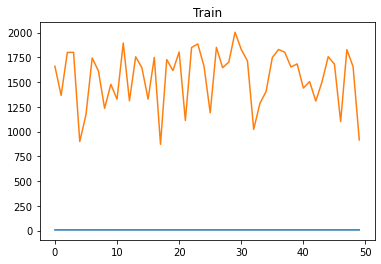

2/2 [==============================] - 1s 7ms/step


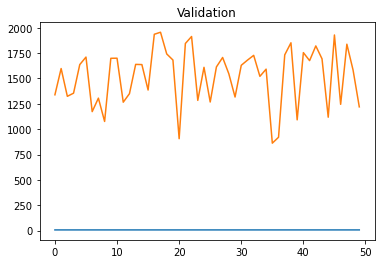

3/3 [==============================] - 0s 5ms/step


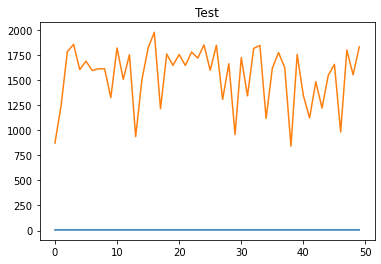

3/3 [==============================] - 0s 8ms/step


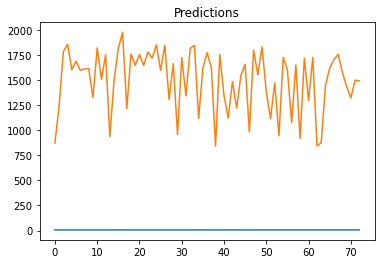

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

2317027.6229222766

# Moving Average with Encoder

### CNN

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2350248.5000 - root_mean_squared_error: 1533.0520 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 613ms/step - loss: 2350248.5000 - root_mean_squared_error: 1533.0520 - val_loss: 2471153.7500 - val_root_mean_squared_error: 1571.9904
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2317099.7500 - root_mean_squared_error: 1522.2023

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 636ms/step - loss: 2302539.0000 - root_mean_squared_error: 1517.4120 - val_loss: 2369909.5000 - val_root_mean_squared_error: 1539.4510
Epoch 3/10
6/8 [=====================>........] - ETA: 0s - loss: 2213843.7500 - root_mean_squared_error: 1487.8990

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 798ms/step - loss: 2180610.7500 - root_mean_squared_error: 1476.6891 - val_loss: 2209395.7500 - val_root_mean_squared_error: 1486.4037
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 1946840.1250 - root_mean_squared_error: 1395.2921

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 511ms/step - loss: 1961408.0000 - root_mean_squared_error: 1400.5028 - val_loss: 1874145.8750 - val_root_mean_squared_error: 1368.9945
Epoch 5/10
5/8 [=================>............] - ETA: 0s - loss: 1709966.7500 - root_mean_squared_error: 1307.6570

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 503ms/step - loss: 1728315.6250 - root_mean_squared_error: 1314.6542 - val_loss: 1526160.7500 - val_root_mean_squared_error: 1235.3788
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 1485414.5000 - root_mean_squared_error: 1218.7759

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 415ms/step - loss: 1462353.3750 - root_mean_squared_error: 1209.2781 - val_loss: 1199589.7500 - val_root_mean_squared_error: 1095.2578
Epoch 7/10
5/8 [=================>............] - ETA: 0s - loss: 1252915.2500 - root_mean_squared_error: 1119.3369

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 347ms/step - loss: 1229043.3750 - root_mean_squared_error: 1108.6223 - val_loss: 911320.5625 - val_root_mean_squared_error: 954.6311
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 958707.0000 - root_mean_squared_error: 979.1359  

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 472ms/step - loss: 963523.3750 - root_mean_squared_error: 981.5923 - val_loss: 667314.8750 - val_root_mean_squared_error: 816.8934
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 810248.3125 - root_mean_squared_error: 900.1379

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 360ms/step - loss: 810248.3125 - root_mean_squared_error: 900.1379 - val_loss: 466272.2812 - val_root_mean_squared_error: 682.8413
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 609573.3750 - root_mean_squared_error: 780.7518

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 6ms/step


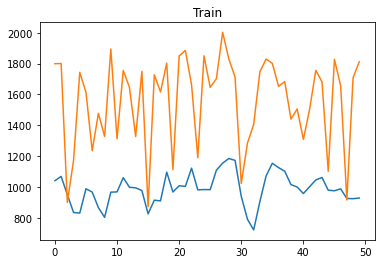

2/2 [==============================] - 0s 6ms/step


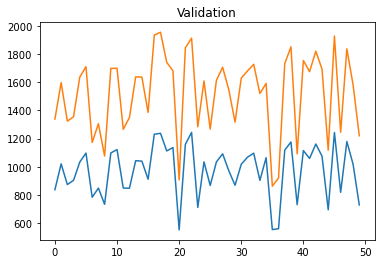

3/3 [==============================] - 0s 8ms/step


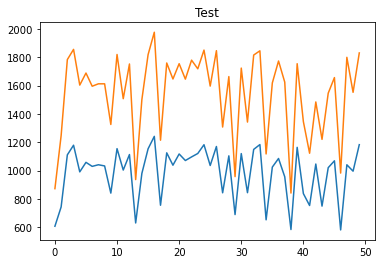

3/3 [==============================] - 0s 4ms/step


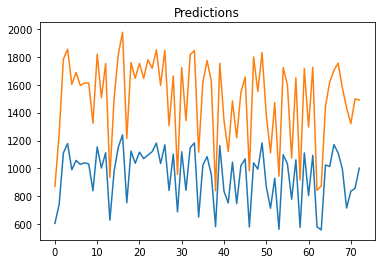

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

309481.16627689515

### RNN

Epoch 1/10
1/8 [==>...........................] - ETA: 20s - loss: 2647230.5000 - root_mean_squared_error: 1627.0312INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 984ms/step - loss: 2419247.0000 - root_mean_squared_error: 1555.3928 - val_loss: 2404385.5000 - val_root_mean_squared_error: 1550.6082
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 2418294.0000 - root_mean_squared_error: 1555.0865INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 656ms/step - loss: 2418294.0000 - root_mean_squared_error: 1555.0865 - val_loss: 2404153.7500 - val_root_mean_squared_error: 1550.5333
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 2421099.7500 - root_mean_squared_error: 1555.9884INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 639ms/step - loss: 2418278.2500 - root_mean_squared_error: 1555.0814 - val_loss: 2403938.0000 - val_root_mean_squared_error: 1550.4637
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 2418017.0000 - root_mean_squared_error: 1554.9974INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 788ms/step - loss: 2418017.0000 - root_mean_squared_error: 1554.9974 - val_loss: 2403210.2500 - val_root_mean_squared_error: 1550.2290
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 2416872.5000 - root_mean_squared_error: 1554.6294INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2416872.5000 - root_mean_squared_error: 1554.6294 - val_loss: 2402296.2500 - val_root_mean_squared_error: 1549.9343
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 2416347.7500 - root_mean_squared_error: 1554.4606INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 753ms/step - loss: 2416347.7500 - root_mean_squared_error: 1554.4606 - val_loss: 2402019.2500 - val_root_mean_squared_error: 1549.8450
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 2415643.5000 - root_mean_squared_error: 1554.2340INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 916ms/step - loss: 2415643.5000 - root_mean_squared_error: 1554.2340 - val_loss: 2401845.5000 - val_root_mean_squared_error: 1549.7889
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 2415487.7500 - root_mean_squared_error: 1554.1840INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 955ms/step - loss: 2415487.7500 - root_mean_squared_error: 1554.1840 - val_loss: 2401683.5000 - val_root_mean_squared_error: 1549.7366
Epoch 9/10
1/8 [==>...........................] - ETA: 0s - loss: 2386079.0000 - root_mean_squared_error: 1544.6938INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2415913.0000 - root_mean_squared_error: 1554.3208 - val_loss: 2401524.7500 - val_root_mean_squared_error: 1549.6854
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 2492179.2500 - root_mean_squared_error: 1578.6637INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 0s 7ms/step


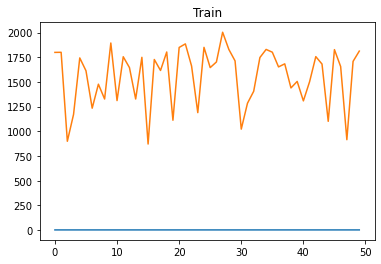

2/2 [==============================] - 1s 19ms/step


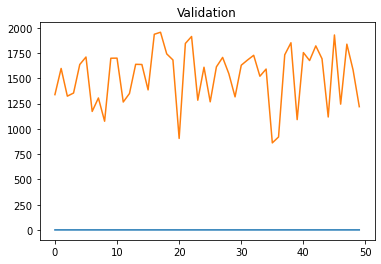

3/3 [==============================] - 0s 9ms/step


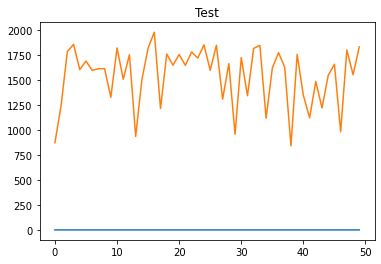

3/3 [==============================] - 0s 4ms/step


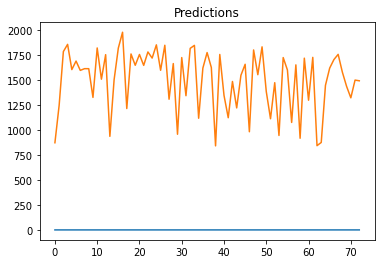

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

2331627.8995374963

### GRU

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2423672.0000 - root_mean_squared_error: 1556.8147

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 2423672.0000 - root_mean_squared_error: 1556.8147 - val_loss: 2409504.0000 - val_root_mean_squared_error: 1552.2577
Epoch 2/10
5/8 [=================>............] - ETA: 0s - loss: 2459964.2500 - root_mean_squared_error: 1568.4274

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2423467.5000 - root_mean_squared_error: 1556.7490 - val_loss: 2409353.0000 - val_root_mean_squared_error: 1552.2091
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 2427374.0000 - root_mean_squared_error: 1558.0032

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2423284.2500 - root_mean_squared_error: 1556.6902 - val_loss: 2409099.5000 - val_root_mean_squared_error: 1552.1274
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 2443566.2500 - root_mean_squared_error: 1563.1910

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2422927.2500 - root_mean_squared_error: 1556.5754 - val_loss: 2408769.7500 - val_root_mean_squared_error: 1552.0212
Epoch 5/10
4/8 [==============>...............] - ETA: 0s - loss: 2420232.0000 - root_mean_squared_error: 1555.7095

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2422604.5000 - root_mean_squared_error: 1556.4718 - val_loss: 2408568.5000 - val_root_mean_squared_error: 1551.9563
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 2422489.5000 - root_mean_squared_error: 1556.4348

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2422489.5000 - root_mean_squared_error: 1556.4348 - val_loss: 2408465.0000 - val_root_mean_squared_error: 1551.9230
Epoch 7/10
4/8 [==============>...............] - ETA: 0s - loss: 2443537.7500 - root_mean_squared_error: 1563.1819

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2422497.2500 - root_mean_squared_error: 1556.4374 - val_loss: 2408134.0000 - val_root_mean_squared_error: 1551.8164
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 2375266.7500 - root_mean_squared_error: 1541.1901

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2421873.5000 - root_mean_squared_error: 1556.2369 - val_loss: 2407696.7500 - val_root_mean_squared_error: 1551.6754
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 2421642.2500 - root_mean_squared_error: 1556.1627

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2421642.2500 - root_mean_squared_error: 1556.1627 - val_loss: 2407606.5000 - val_root_mean_squared_error: 1551.6464
Epoch 10/10
7/8 [=========================>....] - ETA: 0s - loss: 2414150.7500 - root_mean_squared_error: 1553.7538

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 1s 6ms/step


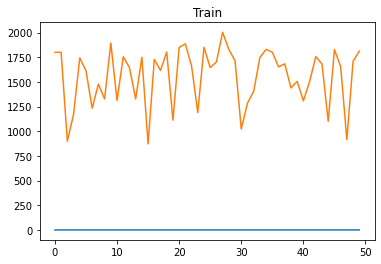

2/2 [==============================] - 2s 6ms/step


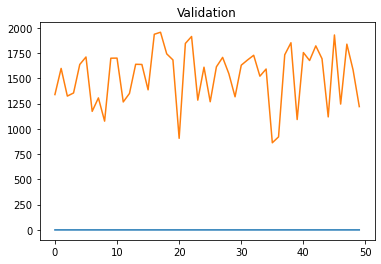

3/3 [==============================] - 0s 5ms/step


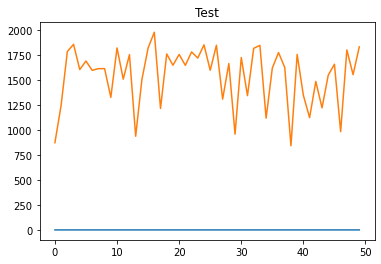

3/3 [==============================] - 0s 23ms/step


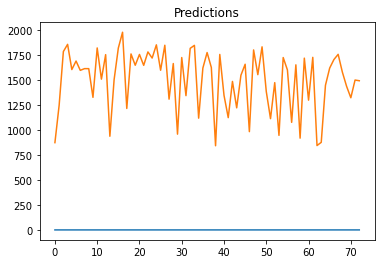

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

2337673.6433372623

### LSTM

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2419414.0000 - root_mean_squared_error: 1555.4465 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 3s/step - loss: 2419414.0000 - root_mean_squared_error: 1555.4465 - val_loss: 2405359.5000 - val_root_mean_squared_error: 1550.9221
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2399017.0000 - root_mean_squared_error: 1548.8761

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2419551.0000 - root_mean_squared_error: 1555.4906 - val_loss: 2405314.7500 - val_root_mean_squared_error: 1550.9077
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 2426636.0000 - root_mean_squared_error: 1557.7664

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2419271.2500 - root_mean_squared_error: 1555.4006 - val_loss: 2405258.2500 - val_root_mean_squared_error: 1550.8895
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 2419384.2500 - root_mean_squared_error: 1555.4370

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2419384.2500 - root_mean_squared_error: 1555.4370 - val_loss: 2405146.7500 - val_root_mean_squared_error: 1550.8535
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 2410092.7500 - root_mean_squared_error: 1552.4474

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2419039.5000 - root_mean_squared_error: 1555.3262 - val_loss: 2404863.5000 - val_root_mean_squared_error: 1550.7622
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 2391646.2500 - root_mean_squared_error: 1546.4949

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2418794.0000 - root_mean_squared_error: 1555.2472 - val_loss: 2404519.7500 - val_root_mean_squared_error: 1550.6514
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 2457711.7500 - root_mean_squared_error: 1567.7091

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2418476.2500 - root_mean_squared_error: 1555.1451 - val_loss: 2404296.2500 - val_root_mean_squared_error: 1550.5793
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 2430762.5000 - root_mean_squared_error: 1559.0903

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2418495.7500 - root_mean_squared_error: 1555.1514 - val_loss: 2404107.0000 - val_root_mean_squared_error: 1550.5183
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 2418015.7500 - root_mean_squared_error: 1554.9971

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2418015.7500 - root_mean_squared_error: 1554.9971 - val_loss: 2404022.0000 - val_root_mean_squared_error: 1550.4908
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 2433248.2500 - root_mean_squared_error: 1559.8872

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 2s 12ms/step


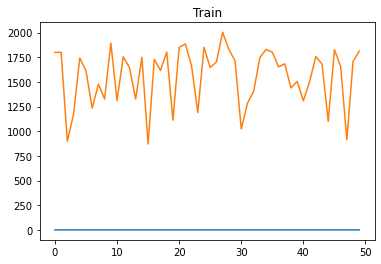

2/2 [==============================] - 2s 7ms/step


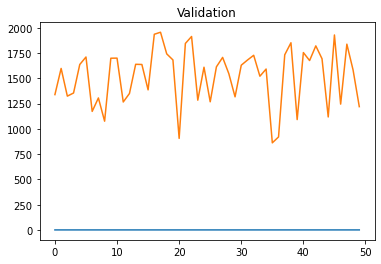

3/3 [==============================] - 0s 5ms/step


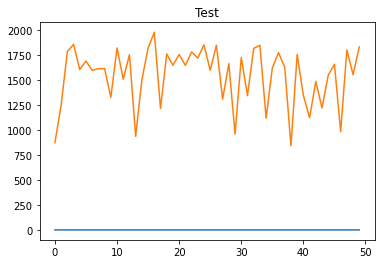

3/3 [==============================] - 0s 10ms/step


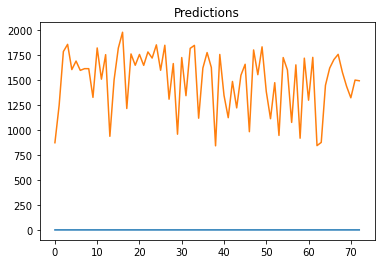

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

2334174.149070993

# Hybrid

## General

### CNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2416794.7500 - root_mean_squared_error: 1554.6044

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 51s 5s/step - loss: 2418312.7500 - root_mean_squared_error: 1555.0925 - val_loss: 2405011.2500 - val_root_mean_squared_error: 1550.8098
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2419768.0000 - root_mean_squared_error: 1555.5603

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2417952.2500 - root_mean_squared_error: 1554.9766 - val_loss: 2404690.5000 - val_root_mean_squared_error: 1550.7064
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2425388.5000 - root_mean_squared_error: 1557.3658

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2417637.2500 - root_mean_squared_error: 1554.8754 - val_loss: 2404382.0000 - val_root_mean_squared_error: 1550.6069
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2417314.2500 - root_mean_squared_error: 1554.7715

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2417314.2500 - root_mean_squared_error: 1554.7715 - val_loss: 2404066.7500 - val_root_mean_squared_error: 1550.5054
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2416971.2500 - root_mean_squared_error: 1554.6611

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2416971.2500 - root_mean_squared_error: 1554.6611 - val_loss: 2403510.5000 - val_root_mean_squared_error: 1550.3259
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2416266.7500 - root_mean_squared_error: 1554.4346

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2416266.7500 - root_mean_squared_error: 1554.4346 - val_loss: 2402756.5000 - val_root_mean_squared_error: 1550.0828
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2415531.7500 - root_mean_squared_error: 1554.1981

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 2415531.7500 - root_mean_squared_error: 1554.1981 - val_loss: 2402070.0000 - val_root_mean_squared_error: 1549.8613
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2413002.2500 - root_mean_squared_error: 1553.3842

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2414995.0000 - root_mean_squared_error: 1554.0254 - val_loss: 2401639.2500 - val_root_mean_squared_error: 1549.7223
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2414525.5000 - root_mean_squared_error: 1553.8744

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2414525.5000 - root_mean_squared_error: 1553.8744 - val_loss: 2401197.2500 - val_root_mean_squared_error: 1549.5797
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2416536.5000 - root_mean_squared_error: 1554.5214

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2414105.5000 - root_mean_squared_error: 1553.7393 - val_loss: 2400799.5000 - val_root_mean_squared_error: 1549.4513
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2413706.0000 - root_mean_squared_error: 1553.6106

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2413706.0000 - root_mean_squared_error: 1553.6106 - val_loss: 2400394.7500 - val_root_mean_squared_error: 1549.3207
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2415474.2500 - root_mean_squared_error: 1554.1796

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2413291.2500 - root_mean_squared_error: 1553.4772 - val_loss: 2399949.7500 - val_root_mean_squared_error: 1549.1771
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2412851.2500 - root_mean_squared_error: 1553.3356

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2412851.2500 - root_mean_squared_error: 1553.3356 - val_loss: 2399518.2500 - val_root_mean_squared_error: 1549.0378
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2412409.7500 - root_mean_squared_error: 1553.1934

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2412409.7500 - root_mean_squared_error: 1553.1934 - val_loss: 2399063.5000 - val_root_mean_squared_error: 1548.8911
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2411950.0000 - root_mean_squared_error: 1553.0454

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2411950.0000 - root_mean_squared_error: 1553.0454 - val_loss: 2398580.2500 - val_root_mean_squared_error: 1548.7351
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2409300.0000 - root_mean_squared_error: 1552.1920

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2411340.5000 - root_mean_squared_error: 1552.8491 - val_loss: 2397877.2500 - val_root_mean_squared_error: 1548.5081
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2410750.0000 - root_mean_squared_error: 1552.6591

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2410750.0000 - root_mean_squared_error: 1552.6591 - val_loss: 2397361.0000 - val_root_mean_squared_error: 1548.3414
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2410249.2500 - root_mean_squared_error: 1552.4978

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2410249.2500 - root_mean_squared_error: 1552.4978 - val_loss: 2396891.2500 - val_root_mean_squared_error: 1548.1897
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2409784.7500 - root_mean_squared_error: 1552.3481

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2409784.7500 - root_mean_squared_error: 1552.3481 - val_loss: 2396435.2500 - val_root_mean_squared_error: 1548.0424
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2409321.7500 - root_mean_squared_error: 1552.1990

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2409321.7500 - root_mean_squared_error: 1552.1990 - val_loss: 2395968.0000 - val_root_mean_squared_error: 1547.8915
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2408364.7500 - root_mean_squared_error: 1551.8907

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 2408877.5000 - root_mean_squared_error: 1552.0559 - val_loss: 2395555.7500 - val_root_mean_squared_error: 1547.7583
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2412566.7500 - root_mean_squared_error: 1553.2439

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2408478.5000 - root_mean_squared_error: 1551.9274 - val_loss: 2395160.7500 - val_root_mean_squared_error: 1547.6307
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2405768.7500 - root_mean_squared_error: 1551.0541

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2408086.0000 - root_mean_squared_error: 1551.8009 - val_loss: 2394781.5000 - val_root_mean_squared_error: 1547.5081
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2407716.7500 - root_mean_squared_error: 1551.6819

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2407716.7500 - root_mean_squared_error: 1551.6819 - val_loss: 2394417.7500 - val_root_mean_squared_error: 1547.3906
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2393898.7500 - root_mean_squared_error: 1547.2229

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2407360.0000 - root_mean_squared_error: 1551.5669 - val_loss: 2394071.0000 - val_root_mean_squared_error: 1547.2786
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2391560.0000 - root_mean_squared_error: 1546.4669

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2407016.0000 - root_mean_squared_error: 1551.4561 - val_loss: 2393735.0000 - val_root_mean_squared_error: 1547.1700
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2406684.5000 - root_mean_squared_error: 1551.3492

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2406684.5000 - root_mean_squared_error: 1551.3492 - val_loss: 2393405.5000 - val_root_mean_squared_error: 1547.0635
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2413428.7500 - root_mean_squared_error: 1553.5214

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2406354.5000 - root_mean_squared_error: 1551.2429 - val_loss: 2393084.7500 - val_root_mean_squared_error: 1546.9600
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2416521.5000 - root_mean_squared_error: 1554.5165

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 2406044.2500 - root_mean_squared_error: 1551.1429 - val_loss: 2392754.7500 - val_root_mean_squared_error: 1546.8531
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2412974.2500 - root_mean_squared_error: 1553.3751

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2405698.5000 - root_mean_squared_error: 1551.0314 - val_loss: 2392425.5000 - val_root_mean_squared_error: 1546.7467
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2419313.7500 - root_mean_squared_error: 1555.4143

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2405392.2500 - root_mean_squared_error: 1550.9327 - val_loss: 2392135.7500 - val_root_mean_squared_error: 1546.6531
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2405109.7500 - root_mean_squared_error: 1550.8417

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2405109.7500 - root_mean_squared_error: 1550.8417 - val_loss: 2391859.2500 - val_root_mean_squared_error: 1546.5637
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2398689.2500 - root_mean_squared_error: 1548.7703

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2404838.0000 - root_mean_squared_error: 1550.7540 - val_loss: 2391581.7500 - val_root_mean_squared_error: 1546.4740
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2404552.7500 - root_mean_squared_error: 1550.6620

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2404552.7500 - root_mean_squared_error: 1550.6620 - val_loss: 2391305.7500 - val_root_mean_squared_error: 1546.3848
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2385648.0000 - root_mean_squared_error: 1544.5543

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2404291.0000 - root_mean_squared_error: 1550.5776 - val_loss: 2391051.0000 - val_root_mean_squared_error: 1546.3024
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2388827.7500 - root_mean_squared_error: 1545.5833

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2404039.7500 - root_mean_squared_error: 1550.4966 - val_loss: 2390805.5000 - val_root_mean_squared_error: 1546.2230
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2406436.5000 - root_mean_squared_error: 1551.2693

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2403799.2500 - root_mean_squared_error: 1550.4191 - val_loss: 2390568.7500 - val_root_mean_squared_error: 1546.1465
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2403561.2500 - root_mean_squared_error: 1550.3423

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2403561.2500 - root_mean_squared_error: 1550.3423 - val_loss: 2390312.2500 - val_root_mean_squared_error: 1546.0635
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2400891.5000 - root_mean_squared_error: 1549.4811

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2403312.5000 - root_mean_squared_error: 1550.2621 - val_loss: 2390086.0000 - val_root_mean_squared_error: 1545.9904
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2416909.7500 - root_mean_squared_error: 1554.6414

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2403088.0000 - root_mean_squared_error: 1550.1897 - val_loss: 2389867.0000 - val_root_mean_squared_error: 1545.9194
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2395063.2500 - root_mean_squared_error: 1547.5992

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2402872.7500 - root_mean_squared_error: 1550.1202 - val_loss: 2389655.5000 - val_root_mean_squared_error: 1545.8511
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2402663.5000 - root_mean_squared_error: 1550.0527

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2402663.5000 - root_mean_squared_error: 1550.0527 - val_loss: 2389449.5000 - val_root_mean_squared_error: 1545.7844
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2394258.7500 - root_mean_squared_error: 1547.3392

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2402460.7500 - root_mean_squared_error: 1549.9873 - val_loss: 2389249.7500 - val_root_mean_squared_error: 1545.7198
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2412499.2500 - root_mean_squared_error: 1553.2222

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2402263.2500 - root_mean_squared_error: 1549.9236 - val_loss: 2389053.5000 - val_root_mean_squared_error: 1545.6564
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2402068.5000 - root_mean_squared_error: 1549.8608

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2402068.5000 - root_mean_squared_error: 1549.8608 - val_loss: 2388862.2500 - val_root_mean_squared_error: 1545.5945
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2401878.7500 - root_mean_squared_error: 1549.7996

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2401878.7500 - root_mean_squared_error: 1549.7996 - val_loss: 2388674.0000 - val_root_mean_squared_error: 1545.5336
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2409189.5000 - root_mean_squared_error: 1552.1564

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2401692.5000 - root_mean_squared_error: 1549.7395 - val_loss: 2388489.7500 - val_root_mean_squared_error: 1545.4740
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2401511.0000 - root_mean_squared_error: 1549.6809

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2401511.0000 - root_mean_squared_error: 1549.6809 - val_loss: 2388309.5000 - val_root_mean_squared_error: 1545.4156
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2401331.5000 - root_mean_squared_error: 1549.6230

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2401331.5000 - root_mean_squared_error: 1549.6230 - val_loss: 2388133.0000 - val_root_mean_squared_error: 1545.3585
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2399245.2500 - root_mean_squared_error: 1548.9497

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 3s 26ms/step


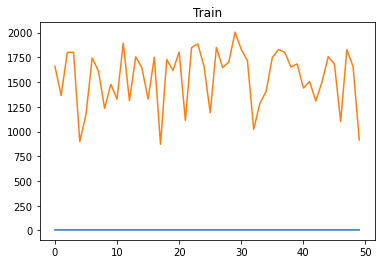

2/2 [==============================] - 11s 19ms/step


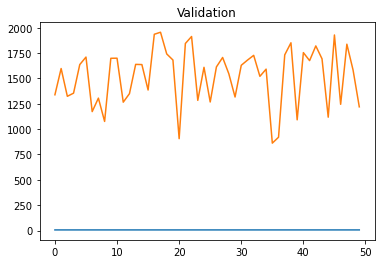

3/3 [==============================] - 0s 50ms/step


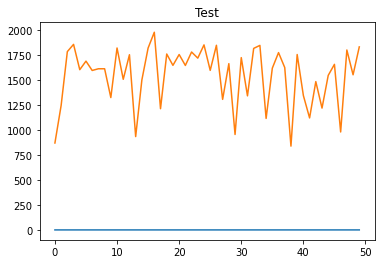

3/3 [==============================] - 0s 12ms/step


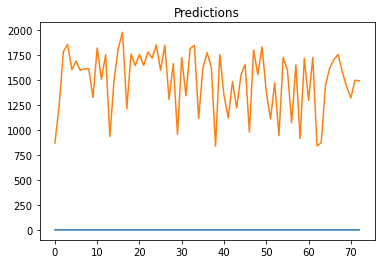

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

2318464.717184486

### RNN LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2418207.2500 - root_mean_squared_error: 1555.0586

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 4s/step - loss: 2418207.2500 - root_mean_squared_error: 1555.0586 - val_loss: 2404751.0000 - val_root_mean_squared_error: 1550.7260
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2417546.5000 - root_mean_squared_error: 1554.8462

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2417546.5000 - root_mean_squared_error: 1554.8462 - val_loss: 2404072.0000 - val_root_mean_squared_error: 1550.5070
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2394006.5000 - root_mean_squared_error: 1547.2577

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2416833.7500 - root_mean_squared_error: 1554.6169 - val_loss: 2403271.2500 - val_root_mean_squared_error: 1550.2488
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2416013.2500 - root_mean_squared_error: 1554.3530

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2416013.2500 - root_mean_squared_error: 1554.3530 - val_loss: 2402511.0000 - val_root_mean_squared_error: 1550.0035
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2432565.2500 - root_mean_squared_error: 1559.6683

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2415293.5000 - root_mean_squared_error: 1554.1215 - val_loss: 2401798.0000 - val_root_mean_squared_error: 1549.7736
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2414581.0000 - root_mean_squared_error: 1553.8922

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2414581.0000 - root_mean_squared_error: 1553.8922 - val_loss: 2401081.0000 - val_root_mean_squared_error: 1549.5422
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2413732.7500 - root_mean_squared_error: 1553.6193

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2413861.5000 - root_mean_squared_error: 1553.6606 - val_loss: 2400352.5000 - val_root_mean_squared_error: 1549.3071
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2437409.5000 - root_mean_squared_error: 1561.2205

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2413127.7500 - root_mean_squared_error: 1553.4246 - val_loss: 2399599.5000 - val_root_mean_squared_error: 1549.0641
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2421249.2500 - root_mean_squared_error: 1556.0364

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2412364.0000 - root_mean_squared_error: 1553.1787 - val_loss: 2398819.0000 - val_root_mean_squared_error: 1548.8121
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2450627.2500 - root_mean_squared_error: 1565.4480

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2411573.2500 - root_mean_squared_error: 1552.9241 - val_loss: 2398004.7500 - val_root_mean_squared_error: 1548.5492
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2410747.2500 - root_mean_squared_error: 1552.6581

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2410747.2500 - root_mean_squared_error: 1552.6581 - val_loss: 2397158.5000 - val_root_mean_squared_error: 1548.2760
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2402779.5000 - root_mean_squared_error: 1550.0902

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2409899.2500 - root_mean_squared_error: 1552.3850 - val_loss: 2396292.2500 - val_root_mean_squared_error: 1547.9962
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2409032.2500 - root_mean_squared_error: 1552.1057

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2409032.2500 - root_mean_squared_error: 1552.1057 - val_loss: 2395419.5000 - val_root_mean_squared_error: 1547.7142
Epoch 14/50
4/8 [==============>...............] - ETA: 0s - loss: 2465576.0000 - root_mean_squared_error: 1570.2153

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2408160.5000 - root_mean_squared_error: 1551.8250 - val_loss: 2394555.5000 - val_root_mean_squared_error: 1547.4352
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 2392099.7500 - root_mean_squared_error: 1546.6415

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2407295.7500 - root_mean_squared_error: 1551.5463 - val_loss: 2393698.5000 - val_root_mean_squared_error: 1547.1582
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2446820.7500 - root_mean_squared_error: 1564.2317

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2406453.2500 - root_mean_squared_error: 1551.2747 - val_loss: 2392858.2500 - val_root_mean_squared_error: 1546.8866
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2426639.5000 - root_mean_squared_error: 1557.7675

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2405621.5000 - root_mean_squared_error: 1551.0066 - val_loss: 2392040.7500 - val_root_mean_squared_error: 1546.6223
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2364980.7500 - root_mean_squared_error: 1537.8494

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2404812.2500 - root_mean_squared_error: 1550.7457 - val_loss: 2391250.7500 - val_root_mean_squared_error: 1546.3669
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2397365.7500 - root_mean_squared_error: 1548.3429

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2404033.5000 - root_mean_squared_error: 1550.4946 - val_loss: 2390478.5000 - val_root_mean_squared_error: 1546.1172
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2403272.7500 - root_mean_squared_error: 1550.2493

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2403272.7500 - root_mean_squared_error: 1550.2493 - val_loss: 2389734.2500 - val_root_mean_squared_error: 1545.8766
Epoch 21/50
4/8 [==============>...............] - ETA: 0s - loss: 2414601.2500 - root_mean_squared_error: 1553.8987

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2402542.7500 - root_mean_squared_error: 1550.0138 - val_loss: 2389021.7500 - val_root_mean_squared_error: 1545.6461
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2401843.0000 - root_mean_squared_error: 1549.7881

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2401843.0000 - root_mean_squared_error: 1549.7881 - val_loss: 2388341.0000 - val_root_mean_squared_error: 1545.4258
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2347532.7500 - root_mean_squared_error: 1532.1660

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2401176.5000 - root_mean_squared_error: 1549.5730 - val_loss: 2387692.7500 - val_root_mean_squared_error: 1545.2161
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2413763.2500 - root_mean_squared_error: 1553.6290

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2400542.5000 - root_mean_squared_error: 1549.3684 - val_loss: 2387078.2500 - val_root_mean_squared_error: 1545.0172
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2406300.7500 - root_mean_squared_error: 1551.2256

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2399944.0000 - root_mean_squared_error: 1549.1753 - val_loss: 2386500.2500 - val_root_mean_squared_error: 1544.8302
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2399379.0000 - root_mean_squared_error: 1548.9929

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2399379.0000 - root_mean_squared_error: 1548.9929 - val_loss: 2385951.5000 - val_root_mean_squared_error: 1544.6526
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2398845.0000 - root_mean_squared_error: 1548.8206

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2398845.0000 - root_mean_squared_error: 1548.8206 - val_loss: 2385432.7500 - val_root_mean_squared_error: 1544.4846
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2413546.7500 - root_mean_squared_error: 1553.5593

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2398340.7500 - root_mean_squared_error: 1548.6577 - val_loss: 2384943.0000 - val_root_mean_squared_error: 1544.3260
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2409869.5000 - root_mean_squared_error: 1552.3755

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2397860.7500 - root_mean_squared_error: 1548.5027 - val_loss: 2384484.2500 - val_root_mean_squared_error: 1544.1775
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2387751.2500 - root_mean_squared_error: 1545.2350

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2397412.5000 - root_mean_squared_error: 1548.3580 - val_loss: 2384047.5000 - val_root_mean_squared_error: 1544.0361
Epoch 31/50
4/8 [==============>...............] - ETA: 0s - loss: 2347941.5000 - root_mean_squared_error: 1532.2994

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2396984.5000 - root_mean_squared_error: 1548.2197 - val_loss: 2383632.0000 - val_root_mean_squared_error: 1543.9016
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2425604.5000 - root_mean_squared_error: 1557.4352

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2396577.0000 - root_mean_squared_error: 1548.0881 - val_loss: 2383229.7500 - val_root_mean_squared_error: 1543.7712
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 2326278.0000 - root_mean_squared_error: 1525.2141

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2396181.0000 - root_mean_squared_error: 1547.9603 - val_loss: 2382847.5000 - val_root_mean_squared_error: 1543.6475
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2395807.5000 - root_mean_squared_error: 1547.8396

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2395807.5000 - root_mean_squared_error: 1547.8396 - val_loss: 2382481.0000 - val_root_mean_squared_error: 1543.5288
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2395450.2500 - root_mean_squared_error: 1547.7242

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2395450.2500 - root_mean_squared_error: 1547.7242 - val_loss: 2382132.2500 - val_root_mean_squared_error: 1543.4158
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2408865.2500 - root_mean_squared_error: 1552.0520

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2395106.2500 - root_mean_squared_error: 1547.6130 - val_loss: 2381802.0000 - val_root_mean_squared_error: 1543.3088
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2343787.5000 - root_mean_squared_error: 1530.9434

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2394784.7500 - root_mean_squared_error: 1547.5092 - val_loss: 2381490.7500 - val_root_mean_squared_error: 1543.2079
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2401742.5000 - root_mean_squared_error: 1549.7556

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2394481.5000 - root_mean_squared_error: 1547.4113 - val_loss: 2381194.0000 - val_root_mean_squared_error: 1543.1118
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2372031.0000 - root_mean_squared_error: 1540.1399

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2394191.2500 - root_mean_squared_error: 1547.3174 - val_loss: 2380914.2500 - val_root_mean_squared_error: 1543.0211
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 2404846.2500 - root_mean_squared_error: 1550.7567

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2393917.5000 - root_mean_squared_error: 1547.2290 - val_loss: 2380646.0000 - val_root_mean_squared_error: 1542.9342
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 2443102.5000 - root_mean_squared_error: 1563.0427

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2393655.7500 - root_mean_squared_error: 1547.1444 - val_loss: 2380390.2500 - val_root_mean_squared_error: 1542.8513
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2393405.0000 - root_mean_squared_error: 1547.0634

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2393405.0000 - root_mean_squared_error: 1547.0634 - val_loss: 2380147.2500 - val_root_mean_squared_error: 1542.7726
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2314126.0000 - root_mean_squared_error: 1521.2252

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2393165.0000 - root_mean_squared_error: 1546.9858 - val_loss: 2379915.7500 - val_root_mean_squared_error: 1542.6975
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2392939.2500 - root_mean_squared_error: 1546.9128

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2392939.2500 - root_mean_squared_error: 1546.9128 - val_loss: 2379693.2500 - val_root_mean_squared_error: 1542.6254
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 2481774.7500 - root_mean_squared_error: 1575.3650

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2392721.7500 - root_mean_squared_error: 1546.8425 - val_loss: 2379479.5000 - val_root_mean_squared_error: 1542.5562
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 2423246.0000 - root_mean_squared_error: 1556.6779

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2392512.2500 - root_mean_squared_error: 1546.7748 - val_loss: 2379274.5000 - val_root_mean_squared_error: 1542.4897
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2419403.5000 - root_mean_squared_error: 1555.4432

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2392310.2500 - root_mean_squared_error: 1546.7095 - val_loss: 2379079.7500 - val_root_mean_squared_error: 1542.4266
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2387136.2500 - root_mean_squared_error: 1545.0360

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2392118.7500 - root_mean_squared_error: 1546.6476 - val_loss: 2378890.5000 - val_root_mean_squared_error: 1542.3652
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2391932.7500 - root_mean_squared_error: 1546.5874

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2391932.7500 - root_mean_squared_error: 1546.5874 - val_loss: 2378708.5000 - val_root_mean_squared_error: 1542.3063
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2391840.2500 - root_mean_squared_error: 1546.5575

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 14ms/step


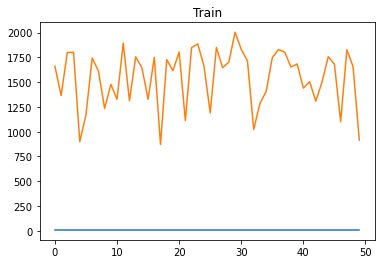

2/2 [==============================] - 4s 14ms/step


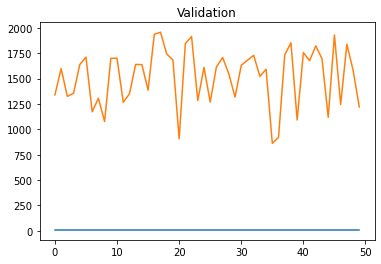

3/3 [==============================] - 0s 35ms/step


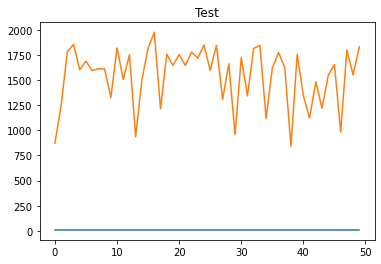

3/3 [==============================] - 0s 7ms/step


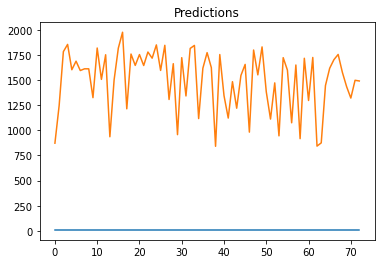

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

2309214.1782632014

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

2024-03-08 20:54:47.187123: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-08 20:54:47.187162: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 20:54:47.187193: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-08 20:54:47.187561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1/8 [==>...........................] - ETA: 13s - loss: 2343551.0000 - root_mean_squared_error: 1530.8661

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 6s 536ms/step - loss: 2415976.2500 - root_mean_squared_error: 1554.3411 - val_loss: 2402498.7500 - val_root_mean_squared_error: 1549.9996
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2450327.7500 - root_mean_squared_error: 1565.3523

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 488ms/step - loss: 2415292.5000 - root_mean_squared_error: 1554.1211 - val_loss: 2401811.5000 - val_root_mean_squared_error: 1549.7778
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 2375666.2500 - root_mean_squared_error: 1541.3197

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 490ms/step - loss: 2414608.0000 - root_mean_squared_error: 1553.9009 - val_loss: 2401124.5000 - val_root_mean_squared_error: 1549.5563
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 2678466.5000 - root_mean_squared_error: 1636.6022

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 4s 531ms/step - loss: 2413921.7500 - root_mean_squared_error: 1553.6801 - val_loss: 2400439.0000 - val_root_mean_squared_error: 1549.3350
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2498901.0000 - root_mean_squared_error: 1580.7913

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 6s 789ms/step - loss: 2413238.5000 - root_mean_squared_error: 1553.4602 - val_loss: 2399744.0000 - val_root_mean_squared_error: 1549.1107
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2560163.0000 - root_mean_squared_error: 1600.0509

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 465ms/step - loss: 2412541.7500 - root_mean_squared_error: 1553.2358 - val_loss: 2399044.7500 - val_root_mean_squared_error: 1548.8851
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 2240461.7500 - root_mean_squared_error: 1496.8173

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 5s 674ms/step - loss: 2411834.7500 - root_mean_squared_error: 1553.0083 - val_loss: 2398336.2500 - val_root_mean_squared_error: 1548.6562
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 2218166.5000 - root_mean_squared_error: 1489.3511

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 452ms/step - loss: 2411123.5000 - root_mean_squared_error: 1552.7793 - val_loss: 2397619.2500 - val_root_mean_squared_error: 1548.4248
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 2207034.5000 - root_mean_squared_error: 1485.6091

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 460ms/step - loss: 2410407.0000 - root_mean_squared_error: 1552.5486 - val_loss: 2396893.5000 - val_root_mean_squared_error: 1548.1904
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 2705621.0000 - root_mean_squared_error: 1644.8772

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 484ms/step - loss: 2409687.5000 - root_mean_squared_error: 1552.3168 - val_loss: 2396164.2500 - val_root_mean_squared_error: 1547.9548
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 2579699.5000 - root_mean_squared_error: 1606.1443

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 4s 600ms/step - loss: 2408959.7500 - root_mean_squared_error: 1552.0824 - val_loss: 2395438.2500 - val_root_mean_squared_error: 1547.7203
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 2557922.2500 - root_mean_squared_error: 1599.3506

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 426ms/step - loss: 2408236.0000 - root_mean_squared_error: 1551.8492 - val_loss: 2394714.7500 - val_root_mean_squared_error: 1547.4866
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2477318.2500 - root_mean_squared_error: 1573.9498

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 455ms/step - loss: 2407513.2500 - root_mean_squared_error: 1551.6163 - val_loss: 2393995.0000 - val_root_mean_squared_error: 1547.2540
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2569106.0000 - root_mean_squared_error: 1602.8431

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 4s 501ms/step - loss: 2406796.2500 - root_mean_squared_error: 1551.3853 - val_loss: 2393278.5000 - val_root_mean_squared_error: 1547.0225
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2658067.0000 - root_mean_squared_error: 1630.3579

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 396ms/step - loss: 2406084.0000 - root_mean_squared_error: 1551.1556 - val_loss: 2392565.7500 - val_root_mean_squared_error: 1546.7921
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2177448.5000 - root_mean_squared_error: 1475.6180

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 445ms/step - loss: 2405376.2500 - root_mean_squared_error: 1550.9275 - val_loss: 2391867.5000 - val_root_mean_squared_error: 1546.5664
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2224447.0000 - root_mean_squared_error: 1491.4580

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 453ms/step - loss: 2404685.5000 - root_mean_squared_error: 1550.7048 - val_loss: 2391187.2500 - val_root_mean_squared_error: 1546.3464
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2181729.0000 - root_mean_squared_error: 1477.0677

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 4s 534ms/step - loss: 2404009.7500 - root_mean_squared_error: 1550.4869 - val_loss: 2390528.0000 - val_root_mean_squared_error: 1546.1333
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2206419.2500 - root_mean_squared_error: 1485.4021

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 4s 515ms/step - loss: 2403363.2500 - root_mean_squared_error: 1550.2784 - val_loss: 2389895.5000 - val_root_mean_squared_error: 1545.9287
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2545850.7500 - root_mean_squared_error: 1595.5723

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 4s 539ms/step - loss: 2402746.0000 - root_mean_squared_error: 1550.0793 - val_loss: 2389293.7500 - val_root_mean_squared_error: 1545.7340
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2483770.5000 - root_mean_squared_error: 1575.9983

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 420ms/step - loss: 2402160.0000 - root_mean_squared_error: 1549.8903 - val_loss: 2388724.5000 - val_root_mean_squared_error: 1545.5499
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2404841.0000 - root_mean_squared_error: 1550.7550

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 465ms/step - loss: 2401605.7500 - root_mean_squared_error: 1549.7115 - val_loss: 2388191.5000 - val_root_mean_squared_error: 1545.3774
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2545457.7500 - root_mean_squared_error: 1595.4491

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 458ms/step - loss: 2401086.5000 - root_mean_squared_error: 1549.5439 - val_loss: 2387698.0000 - val_root_mean_squared_error: 1545.2178
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2528461.0000 - root_mean_squared_error: 1590.1135

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 467ms/step - loss: 2400609.7500 - root_mean_squared_error: 1549.3901 - val_loss: 2387236.7500 - val_root_mean_squared_error: 1545.0685
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2393821.5000 - root_mean_squared_error: 1547.1980

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 493ms/step - loss: 2400162.7500 - root_mean_squared_error: 1549.2458 - val_loss: 2386813.2500 - val_root_mean_squared_error: 1544.9315
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2668085.5000 - root_mean_squared_error: 1633.4275

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 485ms/step - loss: 2399754.7500 - root_mean_squared_error: 1549.1141 - val_loss: 2386423.2500 - val_root_mean_squared_error: 1544.8053
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2380492.7500 - root_mean_squared_error: 1542.8845

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 441ms/step - loss: 2399378.0000 - root_mean_squared_error: 1548.9926 - val_loss: 2386065.0000 - val_root_mean_squared_error: 1544.6893
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2264940.2500 - root_mean_squared_error: 1504.9718

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 443ms/step - loss: 2399030.5000 - root_mean_squared_error: 1548.8804 - val_loss: 2385734.0000 - val_root_mean_squared_error: 1544.5822
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2425665.5000 - root_mean_squared_error: 1557.4548

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 4s 501ms/step - loss: 2398710.5000 - root_mean_squared_error: 1548.7771 - val_loss: 2385427.7500 - val_root_mean_squared_error: 1544.4830
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2232001.5000 - root_mean_squared_error: 1493.9884

In [ ]:
hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedfECC.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")